
<p style="text-align:left">
   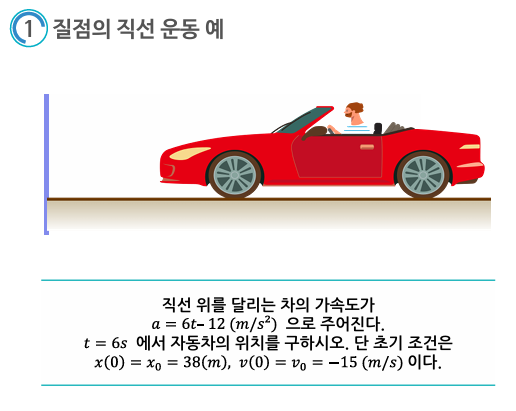
</p>


In [1]:
% 심볼릭 변수 선언
syms t C1 C2

% 가속도 함수 정의
a = 6*t - 12;

% 속도 함수 적분
v = int(a, t) + C1;

% 초기 조건 적용 (v(0) = -15)
C1_value = solve(subs(v, t, 0) == -15, C1);
v = subs(v, C1, C1_value);

% 위치 함수 적분
x = int(v, t) + C2;

% 초기 조건 적용 (x(0) = 38)
C2_value = solve(subs(x, t, 0) == 38, C2);
x = subs(x, C2, C2_value);

% t = 6에서 위치 계산
x_t6 = subs(x, t, 6);

% 결과 출력
disp('속도 함수 v(t):');

속도 함수 v(t):

In [2]:
disp(v);

In [3]:
disp('위치 함수 x(t):');

위치 함수 x(t):

In [4]:
disp(x);

In [5]:
disp('t = 6에서의 위치:');

t = 6에서의 위치:

In [6]:
disp(x_t6);



주어진 문제에서 가속도 함수 $a(t)$ 가 주어졌습니다:


$$a(t)=6t-12\,{\textrm{(m/s}}^2 )$$

이를 이용하여 속도 함수와 위치 함수를 구할 수 있습니다. 초기 조건은 다음과 같습니다:

-  $\displaystyle x(0)=38\,\textrm{m}$
-  $\displaystyle v(0)=-15\,\textrm{m/s}$

 **1.**  **속도 함수** $v(t)$ **구하기:**


가속도는 속도의 시간에 대한 미분이므로, 속도를 구하기 위해서는 가속도를 적분해야 합니다.


 $v(t)=\int a(t)\,dt=\int (6t-12)\,dt=3t^2 -12t+C_1$ �


초기 조건 $v(0)=-15$ 를 사용하여 $C_1$ 를 구합니다:


$$v(0)=3(0)^2 -12(0)+C_1 =-15~~\Rightarrow ~~C_1 =-15$$

따라서 속도 함수는:


$$v(t)=3t^2 -12t-15$$

 **2.**  **위치 함수** $x(t)$ **구하기:**


속도는 위치의 시간에 대한 미분이므로, 위치를 구하기 위해서는 속도를 적분해야 합니다.


 $x(t)=\int v(t)\,dt=\int (3t^2 -12t-15)\,dt=t^3 -6t^2 -15t+C_2$ �


초기 조건 $x(0)=38$ 을 사용하여 $C_2$ 를 구합니다:


$$x(0)=(0)^3 -6(0)^2 -15(0)+C_2 =38~~\Rightarrow ~~C_2 =38$$

따라서 위치 함수는:


$$x(t)=t^3 -6t^2 -15t+38$$

**3.** $t=6$ **에서의 위치 구하기:**


이제 $t=6$ 일 때의 위치를 계산합니다.


$$x(6)=(6)^3 -6(6)^2 -15(6)+38$$

이를 계산하면:


$$x(6)=216-216-90+38=-52\,\textrm{m}$$

**결론:**


차의 위치는 $t=6$ 초일 때 $x=-52\,\textrm{m}$ 입니다.


In [7]:
% 초기 조건 설정
x0 = 38;    % 초기 위치 (m)
v0 = -15;   % 초기 속도 (m/s)
t_final = 6;  % 최종 시간 (s)

% 가속도 함수 정의
a = @(t) 6*t - 12;

% 미분방정식 설정 (위치와 속도 계산)
ode_func = @(t, Y) [Y(2); a(t)];  % Y(1) = x(위치), Y(2) = v(속도)

% 초기 조건 설정 [초기 위치, 초기 속도]
Y0 = [x0; v0];

% 시간 범위 설정
t_vals = linspace(0, t_final, 100);

% 미분방정식 풀이
[t, Y] = ode45(ode_func, t_vals, Y0);  % t: 시간, Y(:, 1): 위치, Y(:, 2): 속도

% 위치 및 속도 계산
x_vals = Y(:, 1);  % 위치
v_vals = Y(:, 2);  % 속도

% 애니메이션 준비
figure;

% 1번째 서브플롯: 애니메이션 준비
subplot(2,1,1);  % 2x1 배열의 첫 번째 서브플롯
hold on;
xlim([min(x_vals)-10, max(x_vals)+10]);
ylim([-5, 5]);
title('자동차 이동 애니메이션');
xlabel('위치 (m)');
ylabel('y (임의 단위)');

% 차 그래픽 생성 (간단한 박스 모양으로)
car_body = rectangle('Position', [x0, 0, 8, 2], 'Curvature', [0.2, 0.2], 'FaceColor', 'r');  % 자동차 본체
wheel1 = rectangle('Position', [x0+1, -0.5, 1, 1], 'Curvature', [1, 1], 'FaceColor', 'k');  % 앞 바퀴
wheel2 = rectangle('Position', [x0+6, -0.5, 1, 1], 'Curvature', [1, 1], 'FaceColor', 'k');  % 뒷 바퀴

% A와 B 지점 표시
plot([x0, max(x_vals)], [0, 0], 'k--');  % 궤적 표시
position_text = text(x0, 3.5, sprintf('위치: %.2f m', x_vals(1)), 'FontSize', 12, 'Color', 'b');

% 2번째 서브플롯: 속도 vs 시간 그래프
subplot(2,1,2);  % 2x1 배열의 두 번째 서브플롯
h = plot(t_vals(1), v_vals(1), 'b-', 'LineWidth', 2);  % 초기 속도 그래프
xlim([0, t_final]);
ylim([min(v_vals)-5, max(v_vals)+5]);
title('시간에 따른 속도');
xlabel('시간 (s)');
ylabel('속도 (m/s)');

% 애니메이션 루프
for i = 1:length(t_vals)
    % 첫 번째 서브플롯에서 자동차 위치 업데이트
    subplot(2,1,1);
    set(car_body, 'Position', [x_vals(i), 0, 8, 2]);  % 자동차 본체 위치 업데이트
    set(wheel1, 'Position', [x_vals(i)+1, -0.5, 1, 1]);  % 앞 바퀴 위치 업데이트
    set(wheel2, 'Position', [x_vals(i)+6, -0.5, 1, 1]);  % 뒷 바퀴 위치 업데이트

    % 위치 정보를 텍스트로 업데이트
    set(position_text, 'Position', [x_vals(i), 3.5], 'String', sprintf('위치: %.2f m', x_vals(i)));

    % 두 번째 서브플롯에서 속도 그래프 업데이트
    subplot(2,1,2);
    set(h, 'XData', t_vals(1:i), 'YData', v_vals(1:i));  % 속도 그래프 업데이트

    pause(0.1);  % 애니메이션 속도 조절
end

hold off;

In [8]:
% 심볼릭 변수 설정
syms t

% 초기 조건 설정
x0 = 38;    % 초기 위치 (m)
v0 = -15;   % 초기 속도 (m/s)
t_final = 6;  % 최종 시간 (s)

% 가속도 함수 정의
a = 6*t - 12;

% 속도 함수 (a(t)의 심볼릭 적분)
v = v0 + int(a, t);

% 위치 함수 (v(t)의 심볼릭 적분)
x = x0 + int(v, t);

% t = 6일 때의 속도와 위치 계산
v_t_final = subs(v, t, t_final);  % 최종 시간에서의 속도
x_t_final = subs(x, t, t_final);  % 최종 시간에서의 위치

% 결과 출력
disp(['t = ', num2str(t_final), '일 때의 속도: ', char(v_t_final), ' m/s']);

t = 6일 때의 속도: 21 m/s

In [9]:
disp(['t = ', num2str(t_final), '일 때의 위치: ', char(x_t_final), ' m']);

t = 6일 때의 위치: -52 m


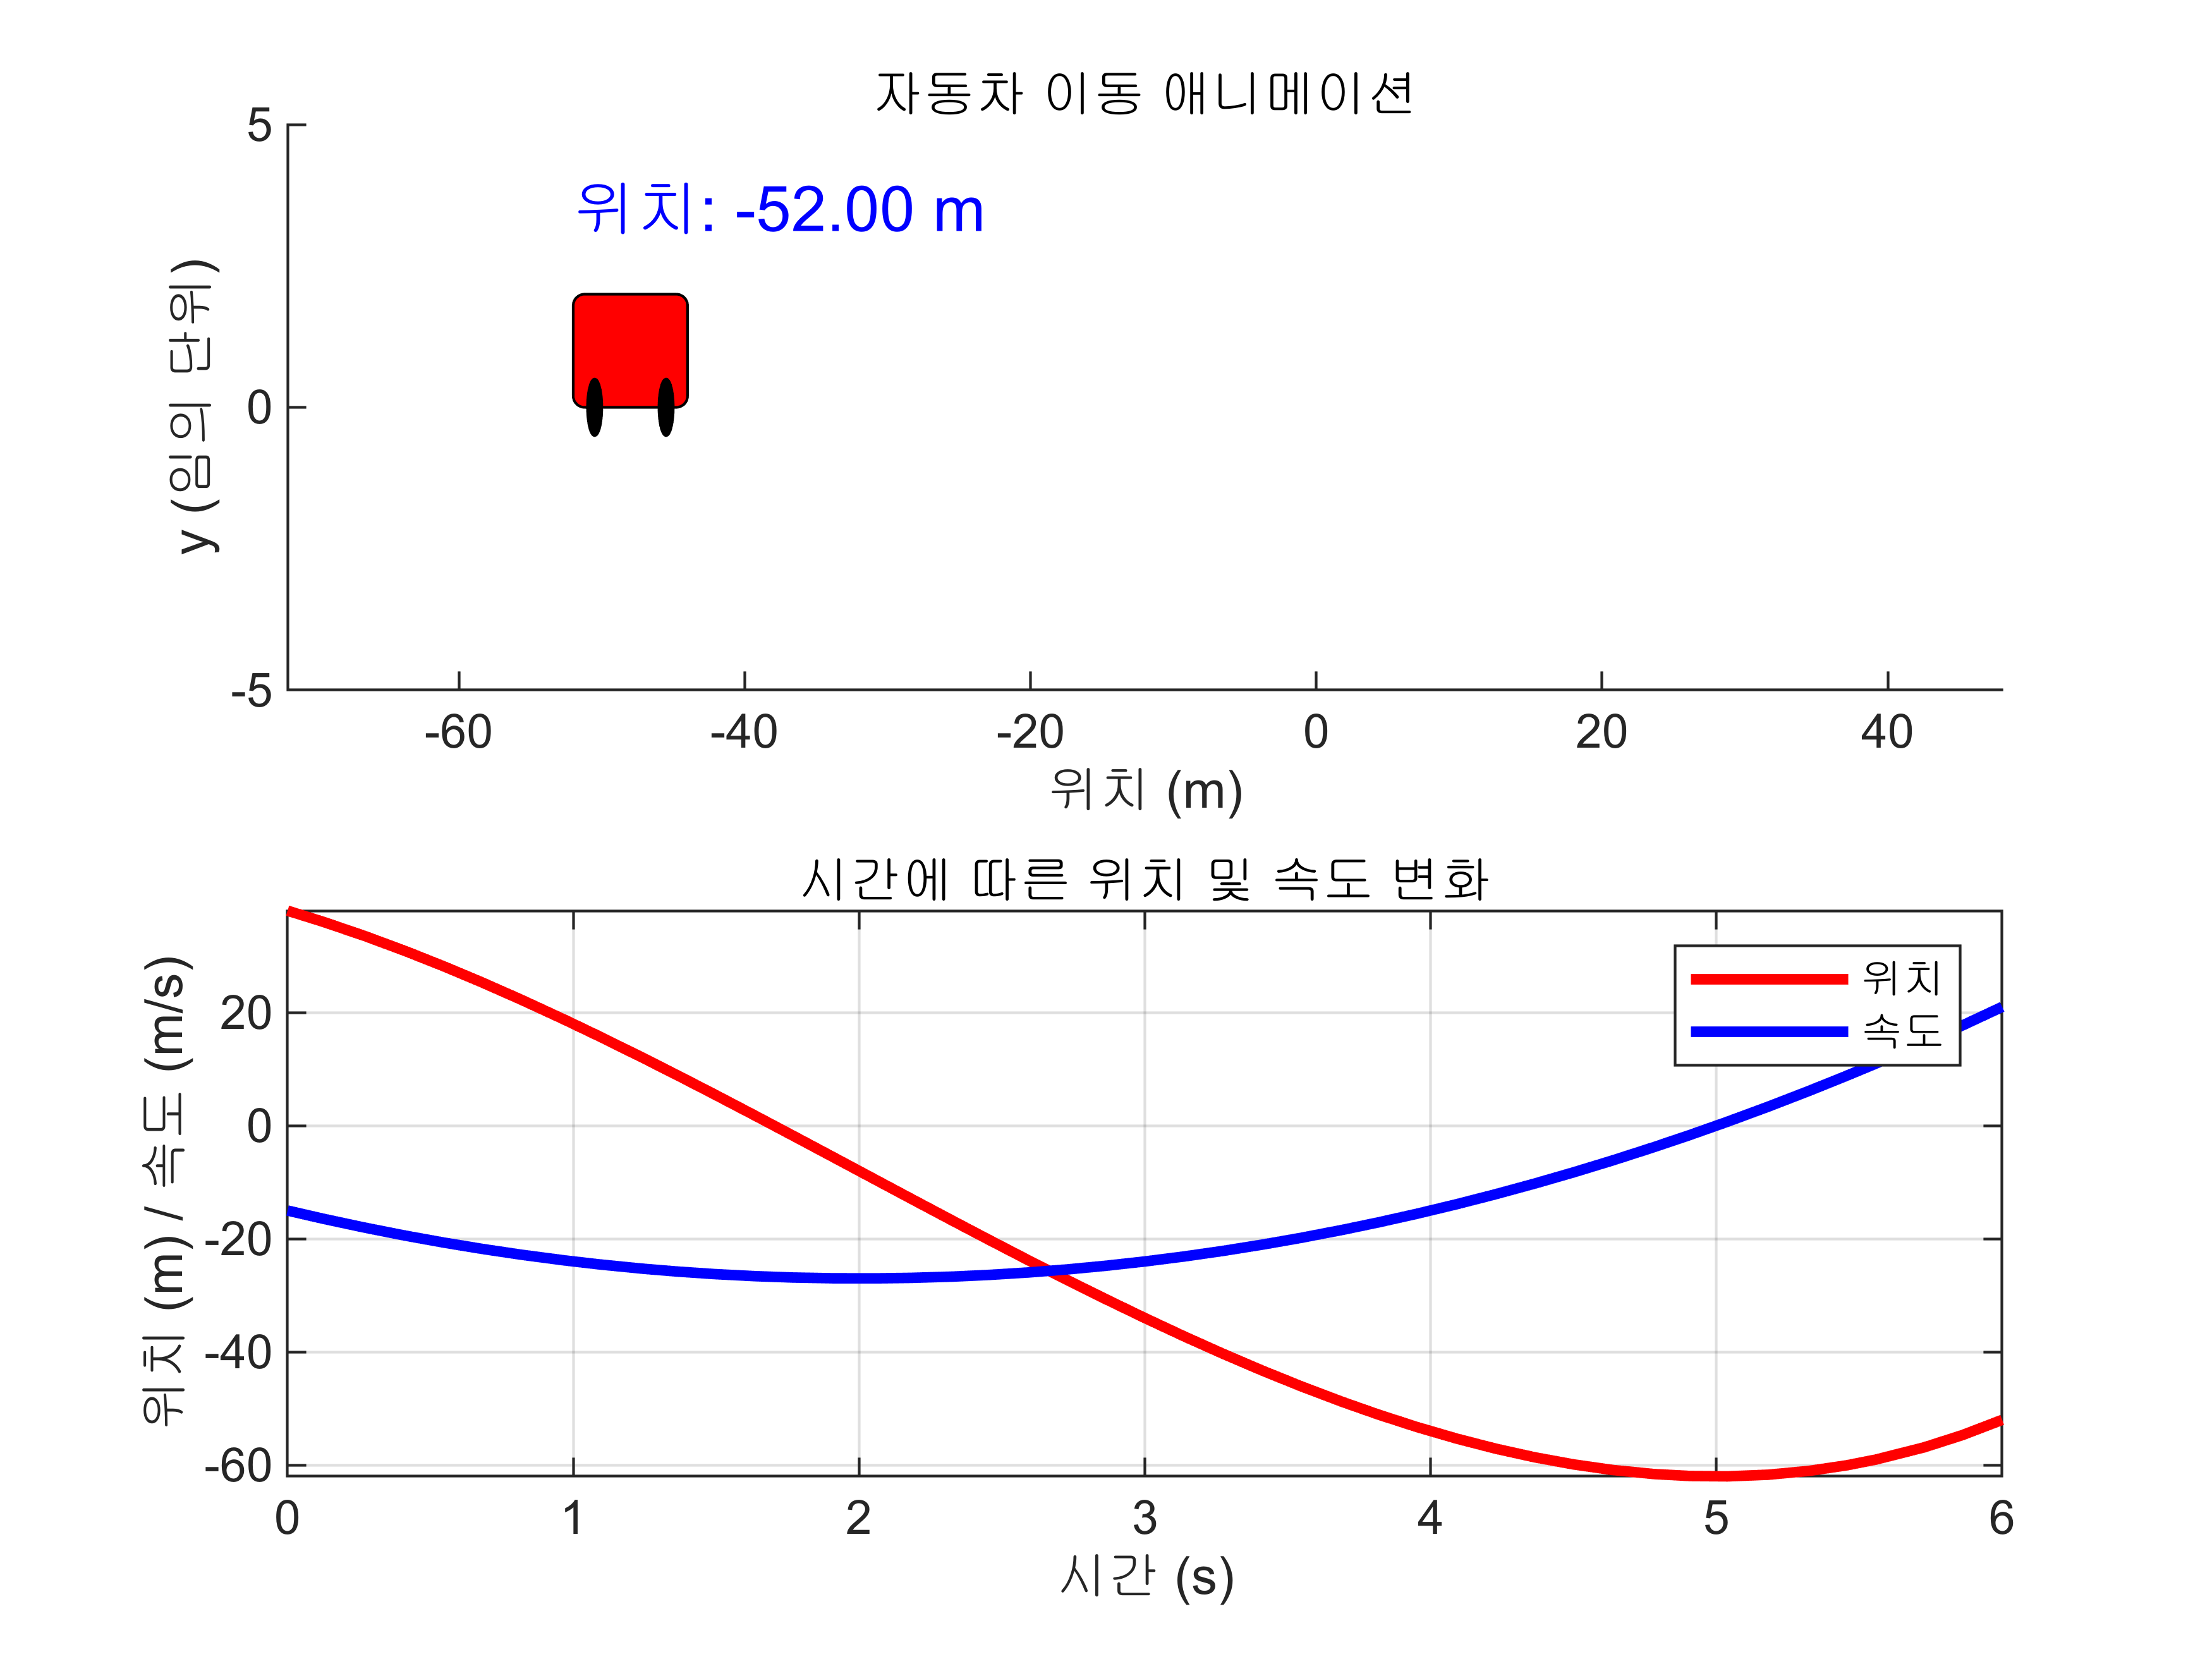

In [10]:

% 위치 및 속도 그래프 그리기
fplot(matlabFunction(x), [0, t_final], 'r-', 'LineWidth', 2);
hold on;
fplot(matlabFunction(v), [0, t_final], 'b-', 'LineWidth', 2);
title('시간에 따른 위치 및 속도 변화');
xlabel('시간 (s)');
ylabel('위치 (m) / 속도 (m/s)');
legend('위치', '속도');
grid on;
hold off;


**가속도가 시간에 대한 함수일 때의 질점 운동 정리:**

-  **가속도 함수** $a(t):$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $a(t)=\frac{dv}{dt}a(t)$ �


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 이는 속도의 시간에 대한 변화율을 나타냅니다.

-  **속도 함수 구하기**:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 가속도를 속도에 대해 적분하여 속도를 구할 수 있습니다.


$$dv=a(t)\,dt$$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 이를 적분하면:


$$v(t)=v_0 +\int_{t_0 }^t a(t)\,dt$$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 여기서 $v_0$ 는 $t_0$ 에서의 초기 속도입니다.

-  **위치 함수 구하기**: 속도를 위치에 대해 적분하여 위치를 구할 수 있습니다. $\frac{dx(t)}{dt}=v(t)dt$
-  이를 적분하면:

$$x(t)=x_0 +\int_{t_0 }^t v(t)\,dt$$

-  여기서 $x_0$ 는 $t_0$ 에서의 초기 위치입니다.

### **부정적분의 정의**

$$∫f(x)dx=F(x)+C$$

여기서:

-  $\int$ : 적분 기호로, 부정적분 또는 정적분을 나타냅니다.
-  $f(x)$ : 피적분 함수로, 우리가 적분하고자 하는 함수입니다.
-  $dx$ : 적분 변수로, x에 대한 적분을 의미합니다.
-  $F(x)$ : 피적분 함수의 원시 함수 또는 부정적분의 결과로 얻어진 함수입니다.
-  $C$ : 적분 상수로, 미분하면 사라지는 상수값입니다.

부정적분은 미분된 결과가 주어졌을 때, 원래 함수 $F(x)$ 를 구하는 과정으로 사용할 수 있습니다. 예를 들어, 다음과 같은 간단한 적분을 생각해 볼 수 있습니다: $\int x^2 \,dx=\frac{x^3 }{3}+C$


In [11]:
% 심볼릭 변수 선언
syms x

% 피적분 함수 정의
f = x^2;

% 부정적분 계산
F = int(f, x);

% 결과 출력
disp('부정적분 결과:');

부정적분 결과:

In [12]:
disp(F);


**1.** **부정적분과 미분의 관계****:**

-  부정적분은 미분의 반대 연산입니다. 어떤 함수 $f(x)$ 의 부정적분은 그 함수의 원시 함수 $F(x)$ 와 같습니다.

$$\int f(x)dx=F(x)+C$$

-  여기서 $f(x)=\frac{dF(x)}{dx}$ �로 표현되며, $F(x)$ 는 $f(x)$ 의 적분입니다.

**2. 운동학에서의 적용****:**

-  \*\*가속도 $a(t)$ \*\*는 속도 $v(t)$ 의 시간에 대한 미분입니다

$$a(t)=\frac{dv(t)}{dt}$$

-  이를 적분하면, 속도 $v(t)$ 를 얻을 수 있습니다:

$$v(t)=\int a(t)\,dt=v(t)+C$$

-  \*\*속도 $v(t)$ \*\*는 위치 $x(t)$ 의 시간에 대한 미분입니다.

 $v(t)=\frac{dx(t)}{dt}$ �

-  이를 적분하면, 위치 $x(t)$ 를 구할 수 있습니다:

$$x(t)=\int v(t)\,dt=x(t)+C$$

In [13]:
% 심볼릭 변수 선언
syms t

% 가속도 함수 정의
a = 6*t - 12;

% 초기 조건 정의
v0 = -15;  % 초기 속도
x0 = 38;   % 초기 위치

% 속도 함수 구하기 (적분)
v = v0 + int(a, t);  % 가속도를 적분하여 속도 함수 구하기

% 위치 함수 구하기 (적분)
x = x0 + int(v, t);  % 속도를 적분하여 위치 함수 구하기

% t = 6에서 속도와 위치 계산
v_t6 = subs(v, t, 6);  % t = 6에서의 속도
x_t6 = subs(x, t, 6);  % t = 6에서의 위치

% 결과 출력
disp('속도 함수 v(t):');

속도 함수 v(t):

In [14]:
disp(v);

In [15]:
disp('위치 함수 x(t):');

위치 함수 x(t):

In [16]:
disp(x);

In [17]:
disp('t = 6에서의 속도:');

t = 6에서의 속도:

In [18]:
disp(v_t6);

In [19]:
disp('t = 6에서의 위치:');

t = 6에서의 위치:

In [20]:
disp(x_t6);


**1.** **실수 지수 함수의 미분****:**


지수 함수 $x^a$ 의 도함수는 다음과 같이 계산됩니다.


$$\frac{d}{dx}(x^a )=a\cdot x^{a-1} ~~(a\not= 0)$$

이는 $a\not= 0$ 일 때 적용되며, 기본적인 지수 함수 미분 공식을 나타냅니다.


 **2.** **실수 지수 함수의 부정적분****:**


지수 함수 $x^a$ 의 부정적분은 다음과 같이 계산됩니다.


$$\int x^a \,dx=\frac{x^{a+1} }{a+1}+C~~(a\not= -1)$$

이는 $a\not= -1$ 일 때 적용되며, 적분 상수 $C$ 를 포함합니다.


**예시:**

-  **미분**: $\frac{d}{dx}(x^3 )=3x^2$
-  **부정적분**: $\int x^3 \,dx=\frac{x^4 }{4}+C$

In [21]:
% 심볼릭 변수 선언
syms x a

% 지수 함수 정의 (예: x^a)
f = x^a;

% 미분 계산
f_derivative = diff(f, x);

% 부정적분 계산
f_integral = int(f, x);

% 결과 출력
disp('지수 함수의 미분:');

지수 함수의 미분:

In [22]:
disp(f_derivative);

In [23]:
disp('지수 함수의 부정적분:');

지수 함수의 부정적분:

In [24]:
disp(f_integral);


**부정적분의 예시:**

1.  $\displaystyle \int x\,dx=\frac{1}{2}x^2 +C$
2. $\displaystyle \int x^2 \,dx=\frac{1}{3}x^3 +C$
3. $\displaystyle \int 3x^3 \,dx=3\cdot \frac{1}{4}x^4 =\frac{3}{4}x^4 +C$
4. $\displaystyle \int dx=x+C$

부정적분은 함수의 미분된 결과가 주어졌을 때, 그 원시 함수를 구하는 과정입니다. 각각의 적분 결과에 적분 상수 CCC가 더해지는 것을 확인할 수 있습니다.


In [25]:
% 심볼릭 변수 선언
syms x

% 1. ∫ x dx 계산
integral_1 = int(x, x);

% 2. ∫ x^2 dx 계산
integral_2 = int(x^2, x);

% 3. ∫ 3x^3 dx 계산
integral_3 = int(3*x^3, x);

% 4. ∫ dx 계산
integral_4 = int(1, x);

% 결과 출력
disp('∫ x dx =');

∫ x dx =

In [26]:
disp(integral_1);

In [27]:

disp('∫ x^2 dx =');

∫ x^2 dx =

In [28]:
disp(integral_2);

In [29]:

disp('∫ 3x^3 dx =');

∫ 3x^3 dx =

In [30]:
disp(integral_3);

In [31]:

disp('∫ dx =');

∫ dx =

In [32]:
disp(integral_4);


**1.** **부정적분의 선형적 성질****:**


부정적분에서 함수 $f(x)$ 와 $g(x)$ 의 합에 대한 적분은 각 함수의 적분을 상수와 함께 더하는 방식으로 계산될 수 있습니다. 이는 다음과 같은 수식으로 표현됩니다:


$$\int [af(x)+bg(x)]dx=a\int f(x)dx+b\int g(x)dx~~(a,b는상수)$$

이는 적분이 함수의 합과 상수에 대해 선형적이라는 것을 보여줍니다.


 **2.** **예시****:**


다음과 같은 다항식을 적분하는 과정을 보여줍니다:


$$\int (4x^3 -3x^2 +1)dx$$

이를 개별 항목에 대해 적분하면:


$$=4\int x^3 dx-3\int x^2 dx+\int 1dx$$

각 항목을 적분한 결과는:


$$=4\cdot \frac{x^4 }{4}-3\cdot \frac{x^3 }{3}+x+C$$

최종 결과는:


$$=x^4 -x^3 +x+C$$

In [33]:
% 심볼릭 변수 선언
syms x

% 다항식 정의
f = 4*x^3 - 3*x^2 + 1;

% 부정적분 계산
integral_f = int(f, x);

% 결과 출력
disp('부정적분 결과:');

부정적분 결과:

In [34]:
disp(integral_f);


**1.** **정적분의 정의****:**


정적분은 부정적분과 달리, 두 점 사이에서 함수의 값을 적분하는 과정입니다.


$$\int_a^b f(x)\,dx=F(b)-F(a)$$

여기서 $F(x)$ 는 $f(x)$ 의 원시 함수입니다.


 **2.** **정적분 예시****:**


$$\int_0^1 (4x^3 -3x^2 +1)\,dx$$

먼저 이 다항식을 적분합니다.


 $=\left(x^4 -x^3 +x\right){\Big|\right.}_0^1$ �


1과 0을 대입하면:


$$=(1-1+1)-(0)=1$$

따라서 정적분 결과는 1입니다.


In [35]:
% 심볼릭 변수 선언
syms x

% 다항식 정의
f = 4*x^3 - 3*x^2 + 1;

% 정적분 계산 (구간 [0, 1])
integral_f = int(f, x, 0, 1);

% 결과 출력
disp('정적분 결과:');

정적분 결과:

In [36]:
disp(integral_f);


**가속도, 속도, 위치 함수 정의**:

-  가속도 함수: $a(t)=6t-12$
-  속도 함수: $v(t)=3t^2 -12t-15$
-  위치 함수: $x(t)=t^3 -6t^2 -15t+38$

**시간에 따른 가속도, 속도, 위치의 변화**



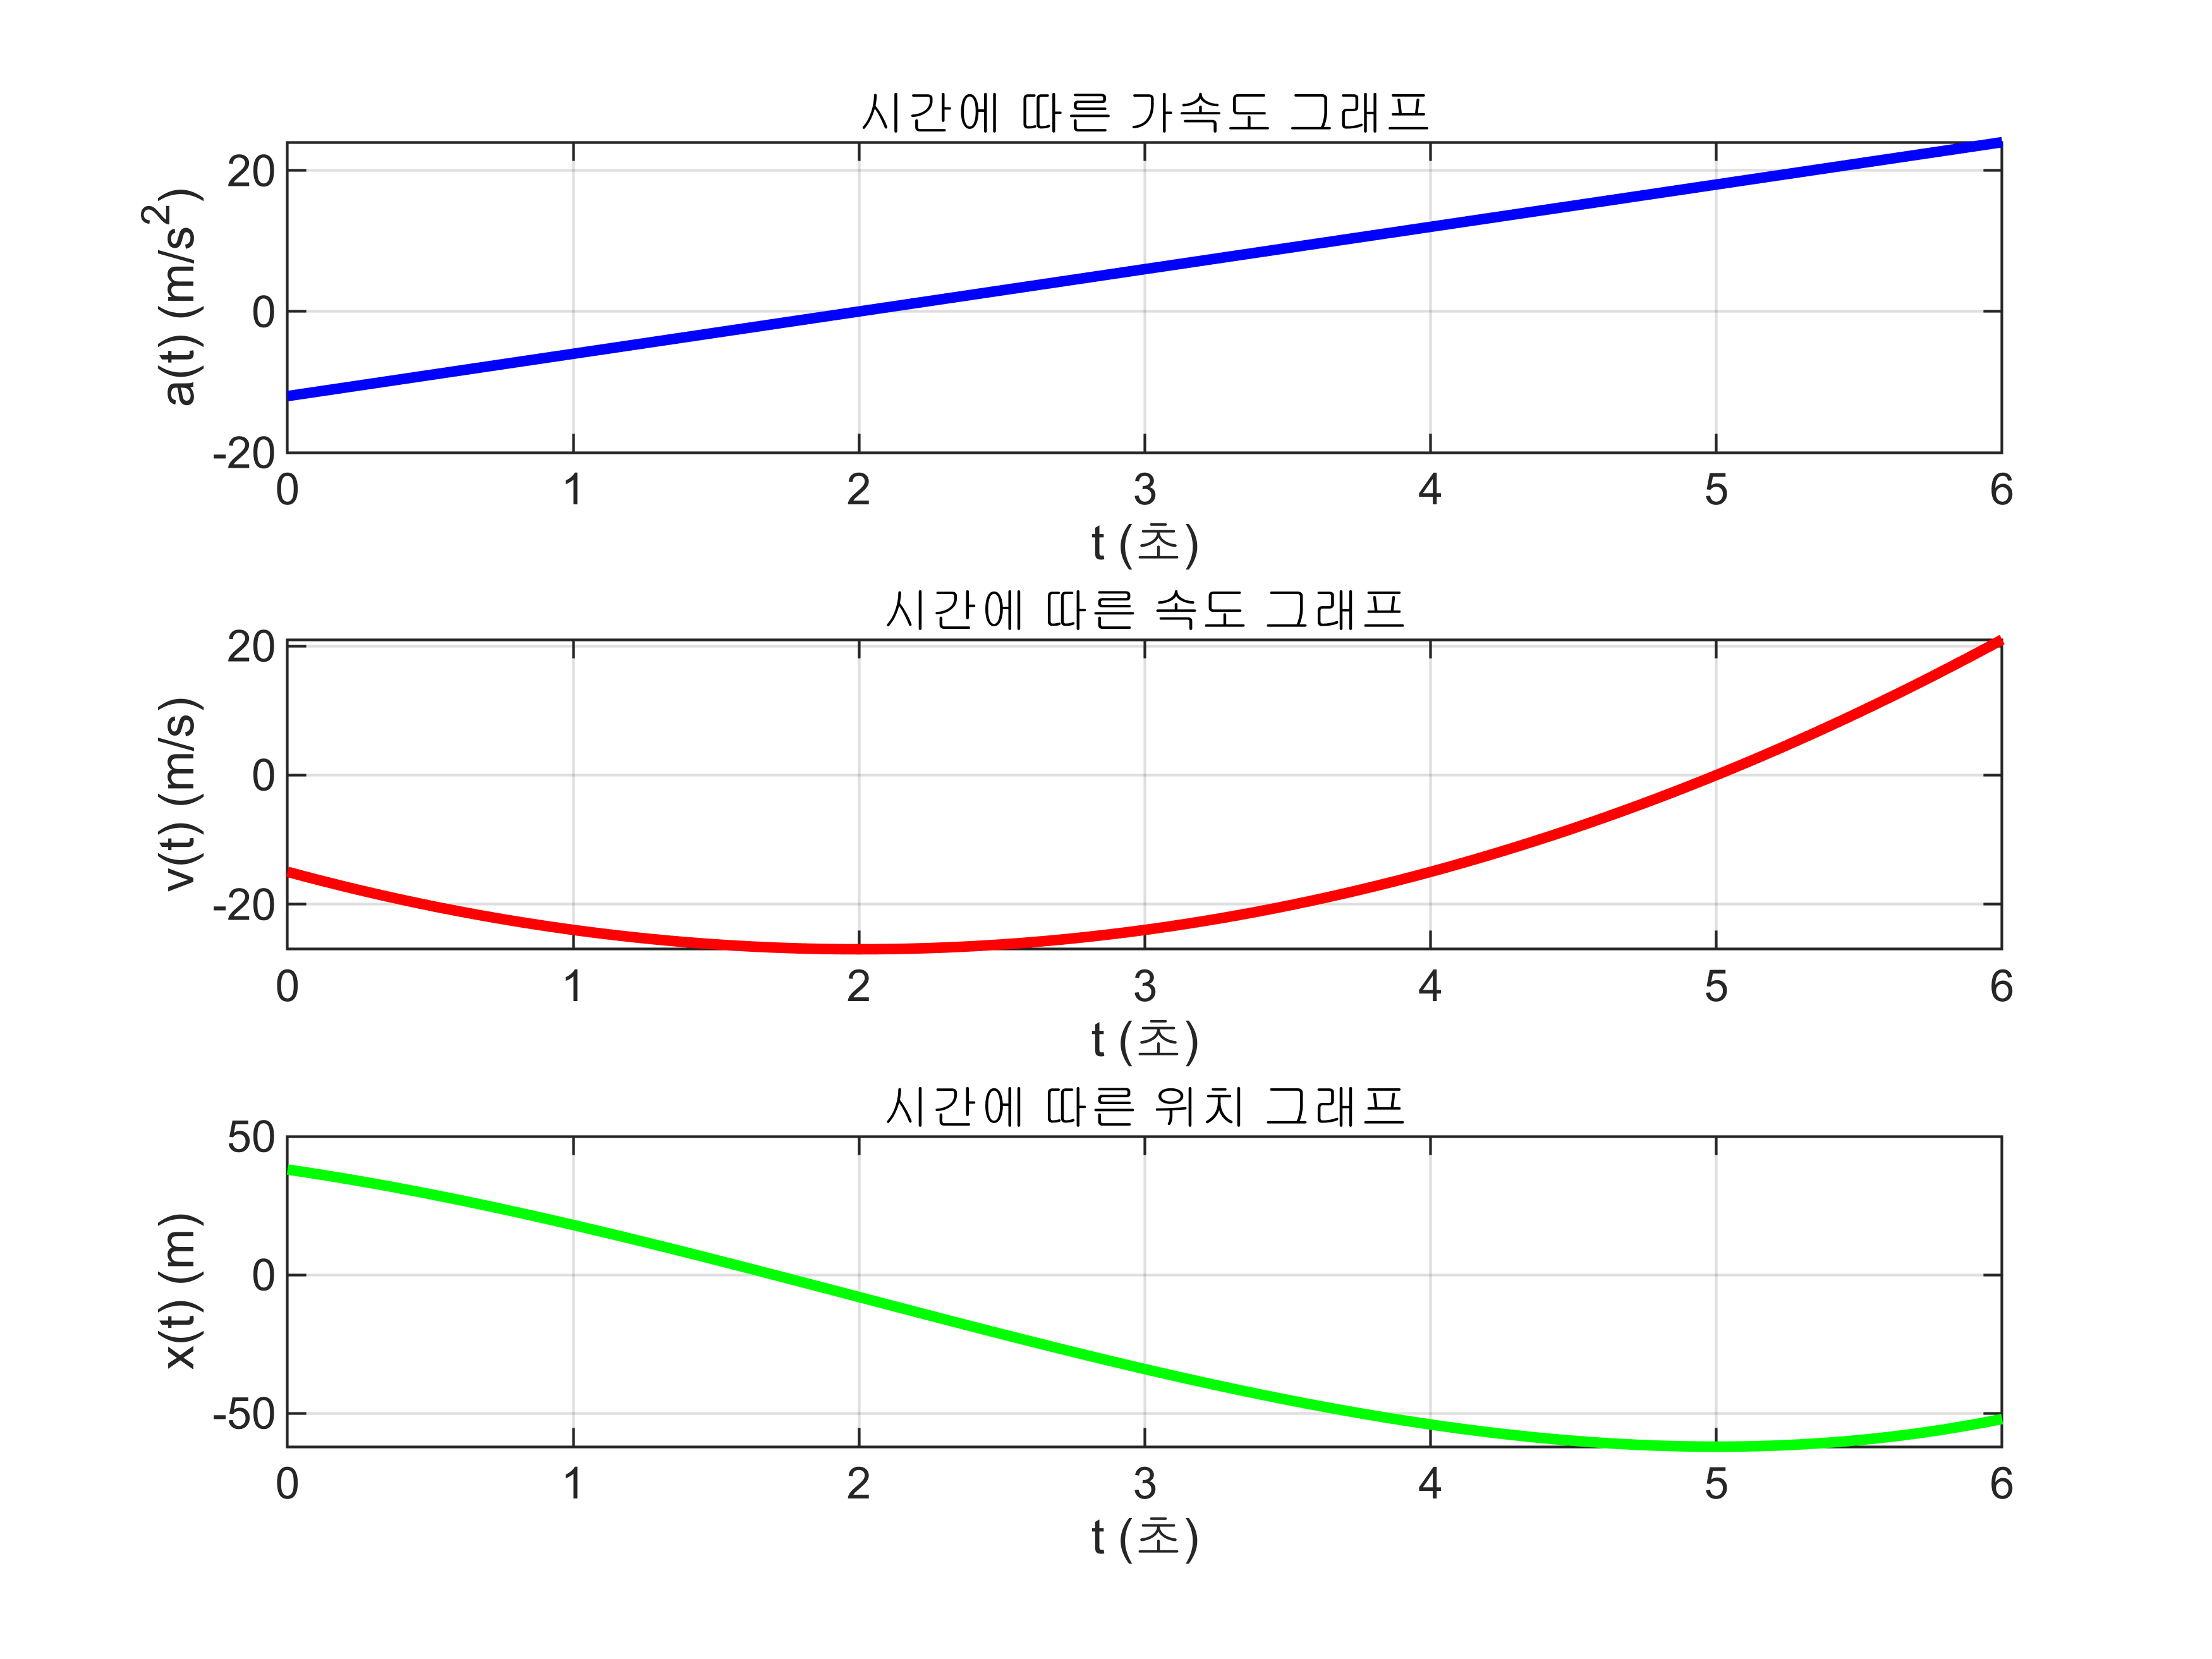

In [37]:
% 시간 범위 설정
t = linspace(0, 6, 100);  % 0에서 6초까지 100개의 점

% 가속도, 속도, 위치 함수 정의
a = 6*t - 12;  % 가속도 함수
v = 3*t.^2 - 12*t - 15;  % 속도 함수 (적분 결과)
x = t.^3 - 6*t.^2 - 15*t + 38;  % 위치 함수 (적분 결과)

% 그래프 그리기
figure;

% 1. 시간에 따른 가속도 그래프
subplot(3,1,1);  % 3개의 그래프 중 첫 번째 위치
plot(t, a, 'b', 'LineWidth', 2);
title('시간에 따른 가속도 그래프');
xlabel('t (초)');
ylabel('a(t) (m/s^2)');
grid on;

% 2. 시간에 따른 속도 그래프
subplot(3,1,2);  % 두 번째 그래프 위치
plot(t, v, 'r', 'LineWidth', 2);
title('시간에 따른 속도 그래프');
xlabel('t (초)');
ylabel('v(t) (m/s)');
grid on;

% 3. 시간에 따른 위치 그래프
subplot(3,1,3);  % 세 번째 그래프 위치
plot(t, x, 'g', 'LineWidth', 2);
title('시간에 따른 위치 그래프');
xlabel('t (초)');
ylabel('x(t) (m)');
grid on;


**등가속도 운동의 수식:**

-  **가속도와 속도의 관계**:

$$\frac{dv}{dt}=a~~\Rightarrow ~~dv=a\,$$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 이를 적분하면 속도를 구할 수 있습니다:


$$\int_{v_0 }^v dv=a\int_{t_0 }^t dt~~\Rightarrow ~~v(t)=v_0 +a(t-t_0 )$$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 여기서 $v_0$ 는 초기 속도입니다.

-  **속도와 위치의 관계**:

$$\frac{dx}{dt}=v~~\Rightarrow ~~dx=v\,$$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 속도 $v(t)=v_0 +a(t-t_0 )$ 를 대입하여 적분하면 위치를 구할 수 있습니다:


$$\int_{x_0 }^x dx=\int_{t_0 }^t [v_0 +a(t-t_0 )]\,dt$$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 이를 풀면:


$$x(t)=x_0 +v_0 (t-t_0 )+\frac{1}{2}a(t-t_0 )^2$$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 여기서 $x_0$ 는 초기 위치입니다.



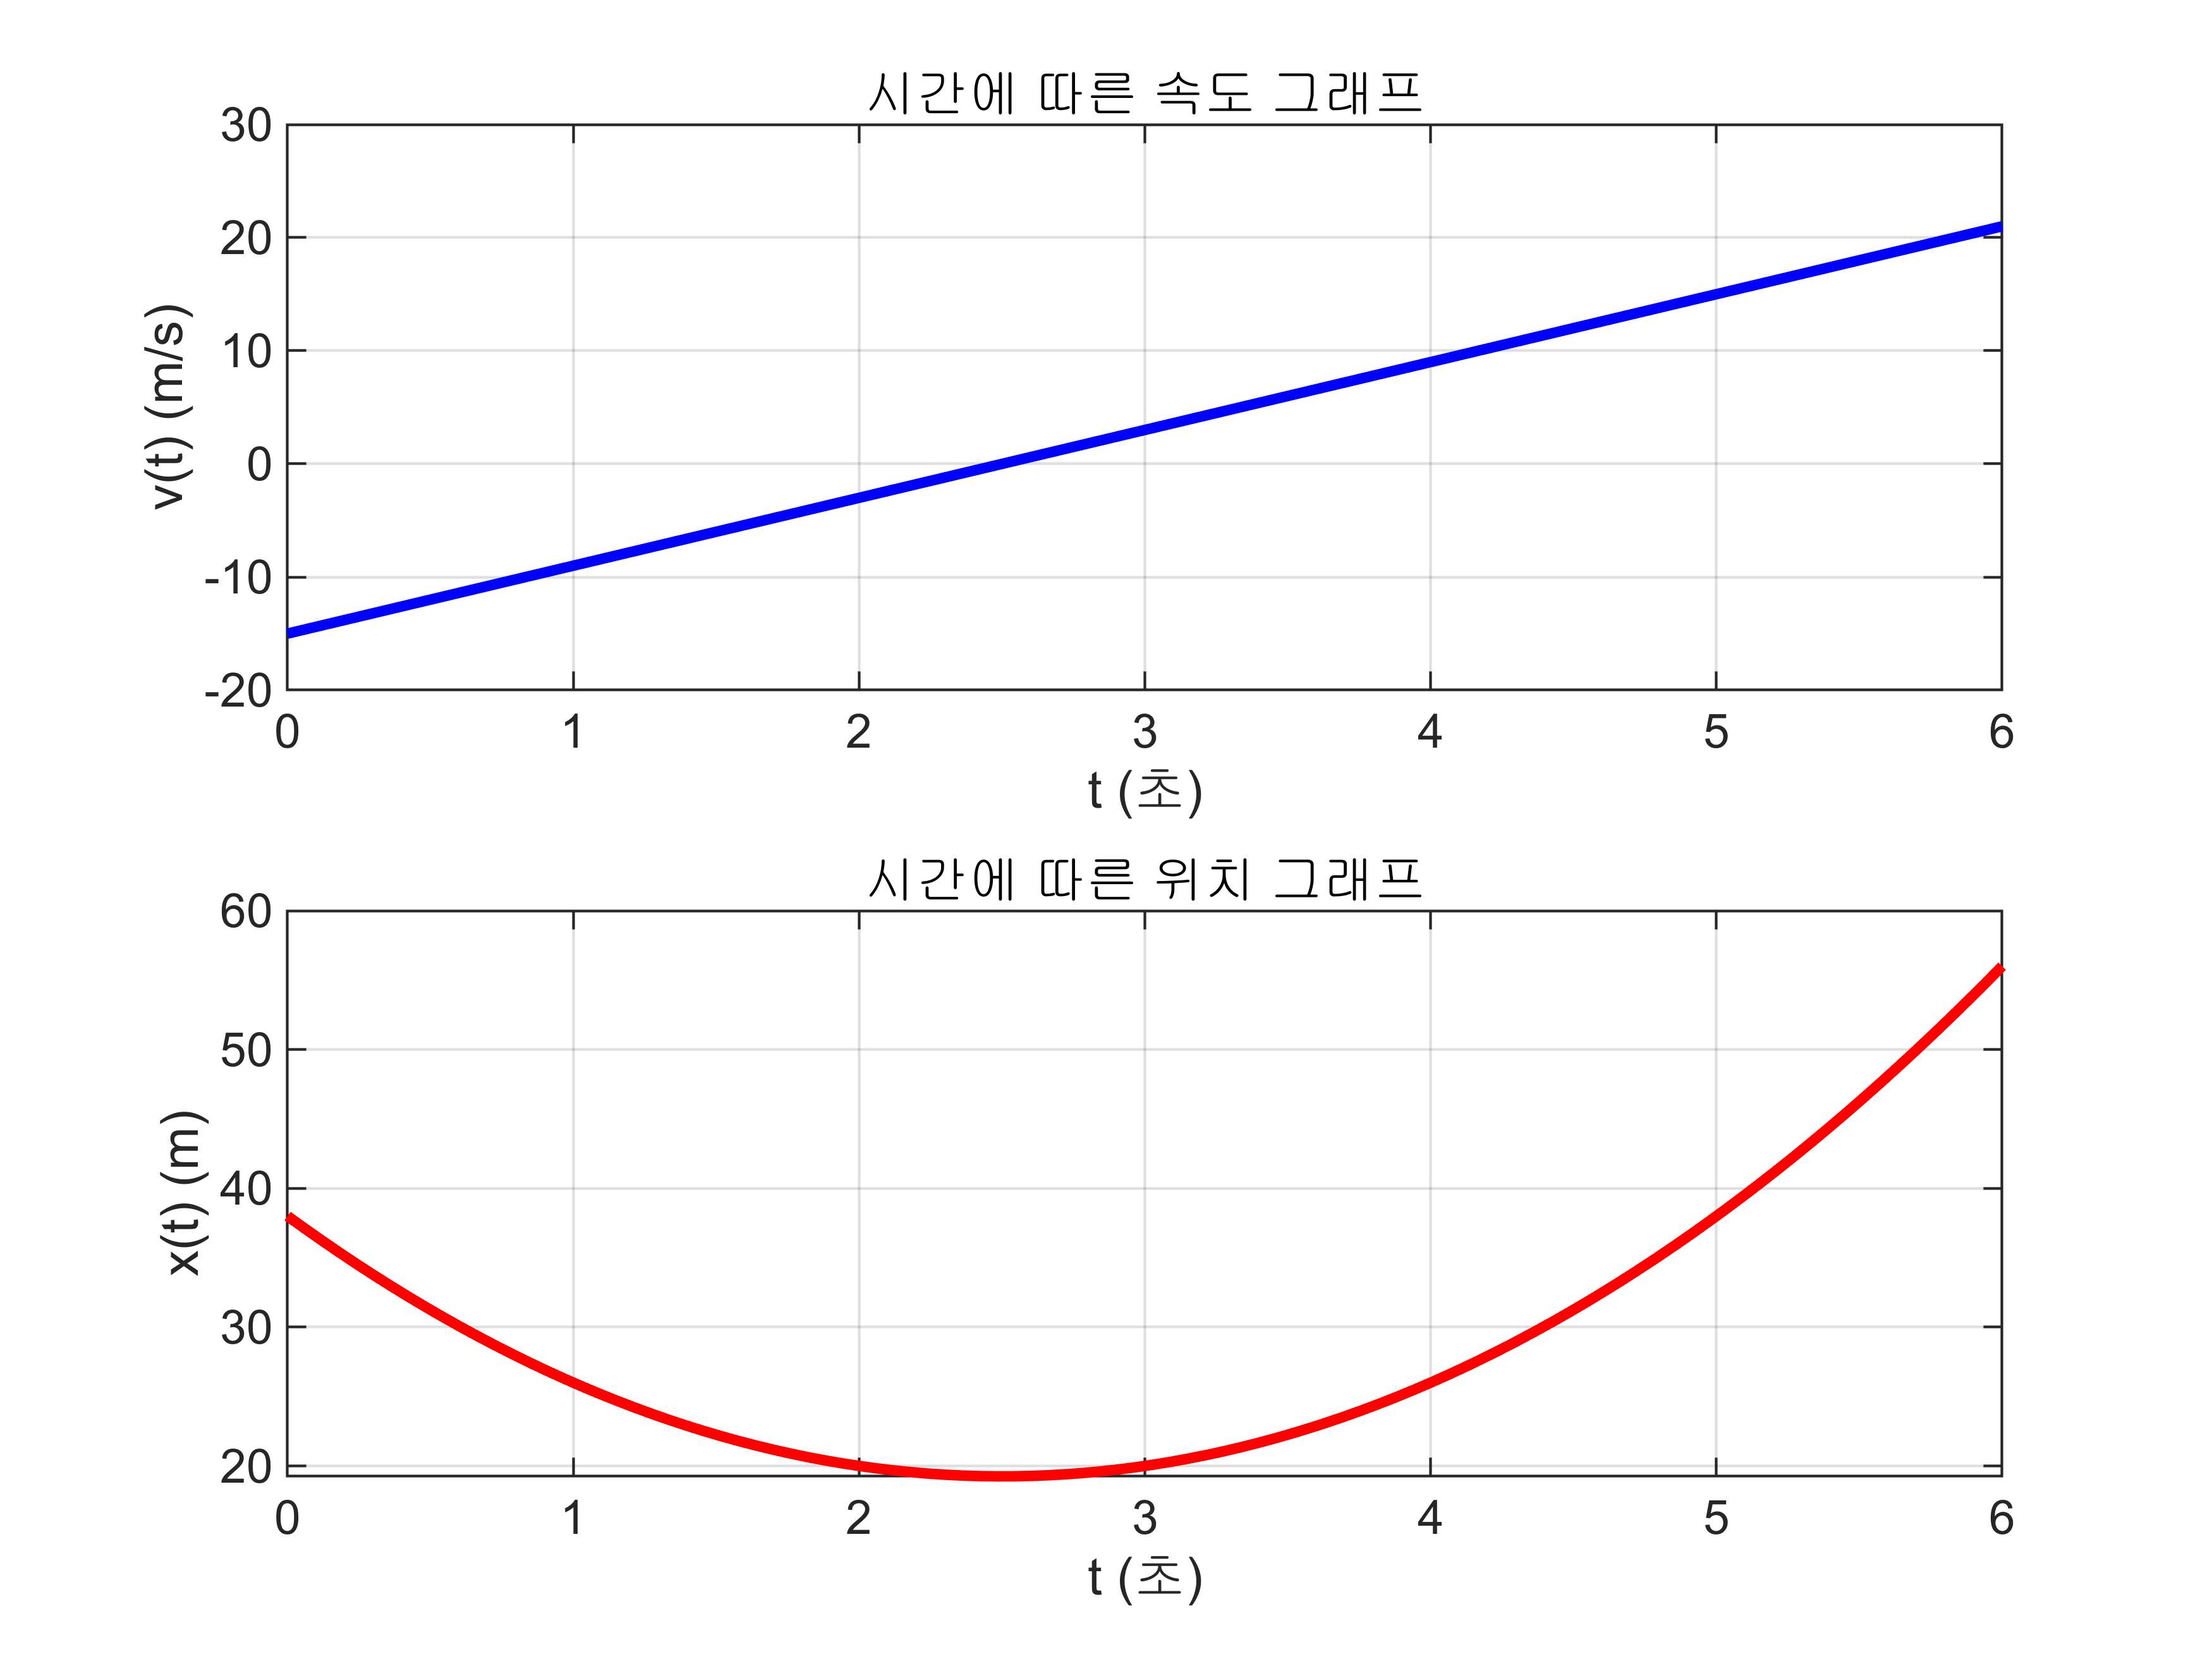

In [38]:
% 초기 조건 설정
v0 = -15;  % 초기 속도 (m/s)
x0 = 38;   % 초기 위치 (m)
a = 6;     % 가속도 (m/s^2)
t0 = 0;    % 초기 시간 (s)

% 시간 범위 설정
t = linspace(0, 6, 100);  % 0초에서 6초까지

% 등가속도 운동 수식 계산
v = v0 + a*(t - t0);  % 속도
x = x0 + v0*(t - t0) + 0.5*a*(t - t0).^2;  % 위치

% 그래프 그리기
figure;

% 시간에 따른 속도 그래프
subplot(2,1,1);
plot(t, v, 'b', 'LineWidth', 2);
title('시간에 따른 속도 그래프');
xlabel('t (초)');
ylabel('v(t) (m/s)');
grid on;

% 시간에 따른 위치 그래프
subplot(2,1,2);
plot(t, x, 'r', 'LineWidth', 2);
title('시간에 따른 위치 그래프');
xlabel('t (초)');
ylabel('x(t) (m)');
grid on;


**등가속도 운동 공식 요약:**

-  **속도 공식**:

$$v(t)=v_0 +a(t-t_0 )$$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 여기서 $v_0$ 는 초기 속도, a는 가속도, $t_0$ �는 초기 시간입니다. $t_0 =0$ 일 때: $v(t)=v_0 +at$

-  **위치 공식**:

$$x(t)=x_0 +v_0 (t-t_0 )+\frac{1}{2}a(t-t_0 )^2$$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$$t_0 =0일때:$$

$$x(t)=x_0 +v_0 t+\frac{1}{2}at^2$$

-  **속도와 위치의 관계**: 등가속도 운동에서 가속도 aaa는 시간에 대한 속도의 변화율을 나타냅니다. 이를 속도와 위치의 관계로 변환하면 다음과 같습니다:

$$a=\frac{dv}{dt}=\frac{dv}{dx}\cdot \frac{dx}{dt}=v\frac{dv}{dx}$$

�               이를 정리하면:


$$vdv=adx$$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 양변을 적분하면:


$$\int_{v_0 }^v vdv=a\int_{x_0 }^x dx$$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 결과적으로:


$$v^2 -v_0^2 =2a(x-x_0 )$$


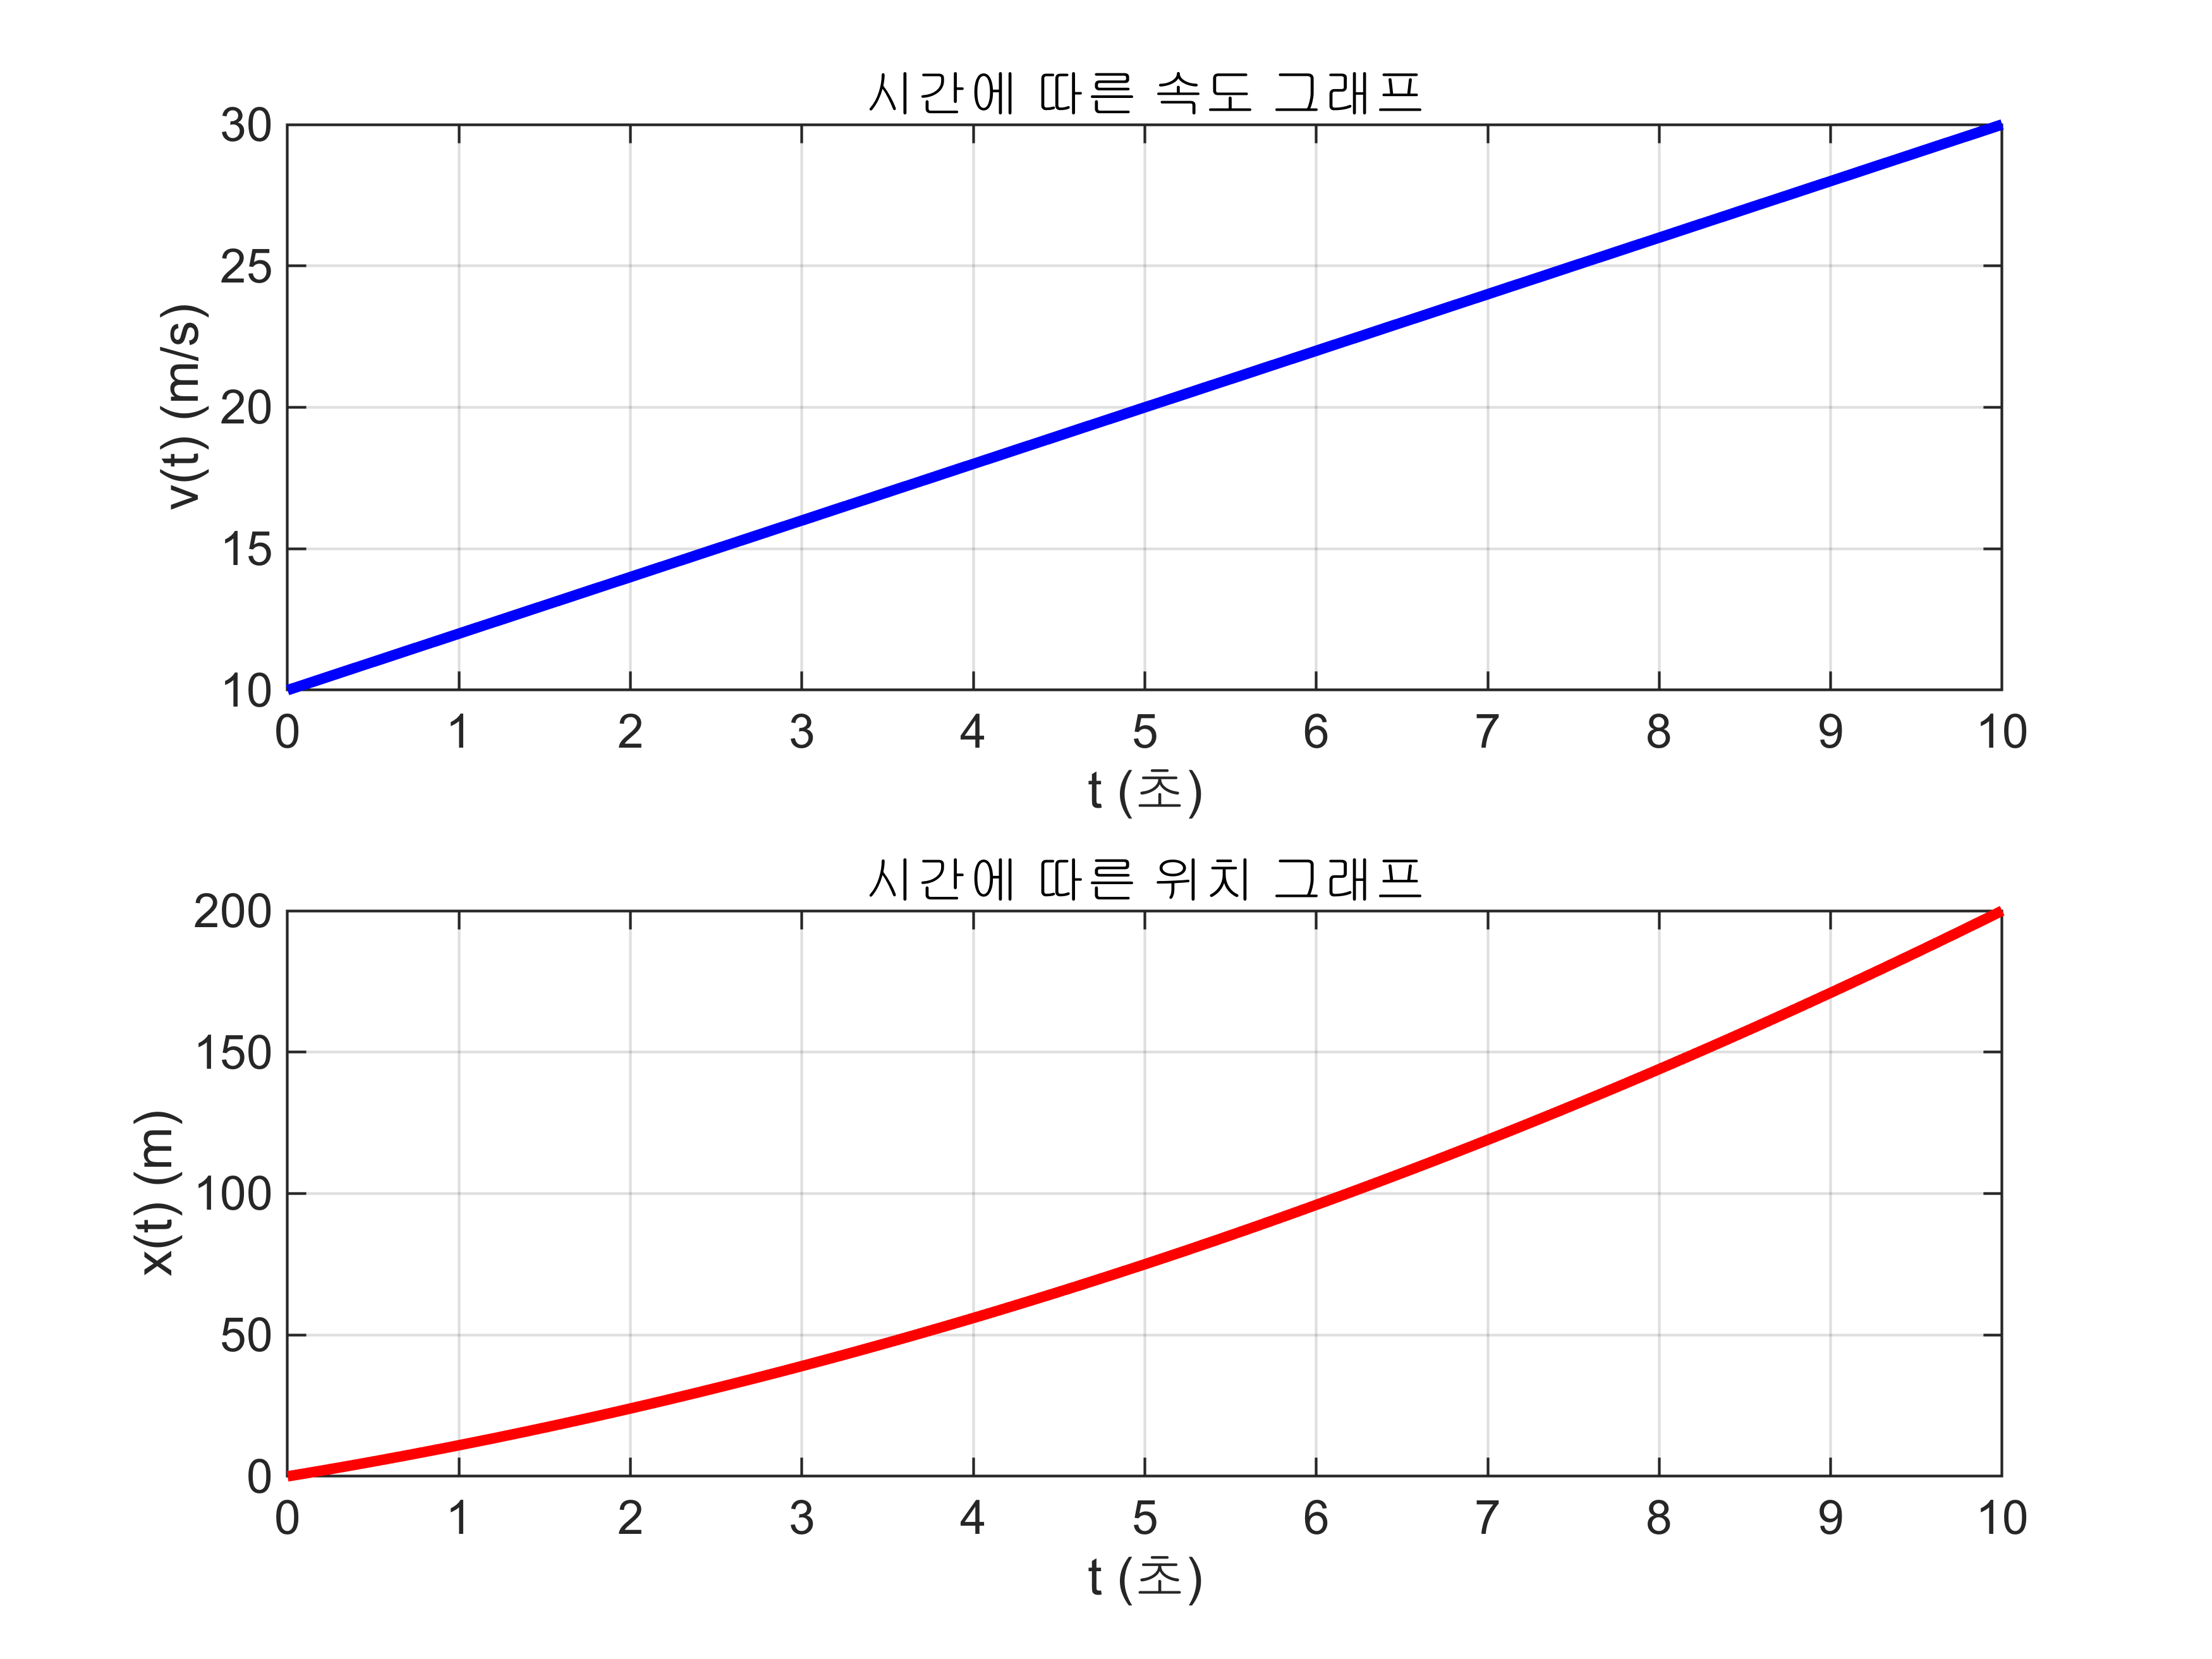

In [39]:
% 초기 조건 설정
v0 = 10;   % 초기 속도 (m/s)
x0 = 0;    % 초기 위치 (m)
a = 2;     % 가속도 (m/s^2)

% 시간 범위 설정
t = linspace(0, 10, 100);  % 0초에서 10초까지

% 속도 및 위치 계산
v = v0 + a*t;  % 속도 공식
x = x0 + v0*t + 0.5*a*t.^2;  % 위치 공식

% 속도와 위치 그래프 그리기
figure;

% 1. 시간에 따른 속도 그래프
subplot(2,1,1);
plot(t, v, 'b', 'LineWidth', 2);
title('시간에 따른 속도 그래프');
xlabel('t (초)');
ylabel('v(t) (m/s)');
grid on;

% 2. 시간에 따른 위치 그래프
subplot(2,1,2);
plot(t, x, 'r', 'LineWidth', 2);
title('시간에 따른 위치 그래프');
xlabel('t (초)');
ylabel('x(t) (m)');
grid on;

<p style="text-align:left">
   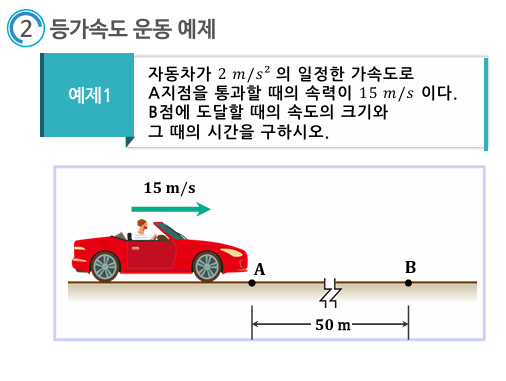
</p>


**문제 정리:**

-  가속도 $a=2\,{\textrm{m/s}}^2$
-  A 지점을 통과할 때의 속도 $v_0 =15\,\textrm{m/s}$
-  A에서 B까지의 거리 $d=50\,\textrm{m}$

**구해야 할 것:**

1.  B 지점에 도달할 때의 속도 $v_B$ �
2. B 지점에 도달할 때까지 걸리는 시간 $t_B$ �

**1. B 지점에서의 속도 구하기:**


등가속도 운동에서 속도와 위치 사이의 관계식은 다음과 같습니다:


$$v^2 -v_0^2 =2a(x-x_0 )$$

이때 $x-x_0 =50$ , $v_0 =15$ , 그리고 $a=2\,{\textrm{m/s}}^2$ 이므로, B 지점에서의 속도 $v_B$ 는 다음과 같이 구할 수 있습니다:


$$v_B^2 =v_0^2 +2a(x-x_0 )$$

$$v_B^2 =15^2 +2\cdot 2\cdot 50$$

$$v_B^2 =225+200=425$$

$$v_B =\sqrt{425}\approx 20.62\,$$

따라서, B 지점에서의 속도는 약 **20.62 m/s**입니다.


**2. B 지점에 도달하는 시간 구하기:**


속도와 가속도, 시간을 이용한 등가속도 운동 방정식은 다음과 같습니다:


$$v=v_0 +at$$

이를 사용해 B 지점에 도달할 때까지 걸리는 시간을 구할 수 있습니다. $v_B =20.62$ , $v_0 =15\,\textrm{m/s},$ $a=2\,{\textrm{m/s}}^2$ 를 대입하면:


$$t_B =\frac{v_B -v_0 }{a}$$

$$t_B =\frac{20.62-15}{2}\approx \frac{5.62}{2}\approx 2.81\,\textrm{초}$$

따라서 B 지점에 도달하는 시간은 약 **2.81초**입니다.


In [40]:
% 초기 조건 설정
v0 = 15;  % A 지점에서의 초기 속도 (m/s)
a = 2;    % 가속도 (m/s^2)
d = 50;   % A에서 B까지의 거리 (m)

% B 지점에서의 속도 계산
vB = sqrt(v0^2 + 2*a*d);

% B 지점에 도달하는 시간 계산
tB = (vB - v0) / a;

% 결과 출력
disp(['B 지점에서의 속도: ', num2str(vB), ' m/s']);

B 지점에서의 속도: 20.6155 m/s

In [41]:
disp(['B 지점에 도달하는 시간: ', num2str(tB), ' 초']);

B 지점에 도달하는 시간: 2.8078 초


**문제 정리:**

-  초기 속도 $v_0 =15\,\textrm{m/s}$
-  가속도 $a=2\,{\textrm{m/s}}^2$
-  A에서 B까지의 거리 $x_B =50\,\textrm{m}$

**풀이 과정:**

-  **속도 방정식**:

$$v(t)=v_0 +at=15+2t$$

-  **위치 방정식**:

$$x(t)=x_0 +v_0 t+\frac{1}{2}at^2 =0+15t+\frac{1}{2}(2)t^2 =15t+t^2$$

-  **B 지점에서의 위치 조건**: B 지점에서 x(t)=50x(t) = 50x(t)=50이므로, 다음과 같은 이차 방정식을 얻습니다:

$$t^2 +15t-50=0$$

이를 근의 공식으로 풀면:


$$t=\frac{-15\pm \sqrt{15^2 -4(1)(-50)}}{2(1)}=\frac{-15\pm \sqrt{225+200}}{2}=\frac{-15\pm \sqrt{425}}{2}$$

$$t=\frac{-15\pm 20.62}{2}$$

�두 근을 구하면:


$$t_1 =\frac{-15+20.62}{2}=2.81\,\textrm{초}$$

$$t_2 =\frac{-15-20.62}{2}=-17.81\,\textrm{초}~~(\textrm{음의}\;\textrm{시간은}\;\textrm{무시})$$

따라서 B 지점에 도달하는 시간은 $t=2.81\,\textrm{초}$ 입니다.

-  **B 지점에서의 속도**: B 지점에서의 속도는 속도 방정식에 $t=2.81$ 을 대입하여 구할 수 있습니다:

$$v_B =15+2(2.81)=15+5.62=20.62\,\textrm{m/s}$$

**결론:**

-  B 지점에 도달하는 시간: $t=2.81\,\textrm{초}$
-  B 지점에서의 속도: $v_B =20.62\,\textrm{m/s}$


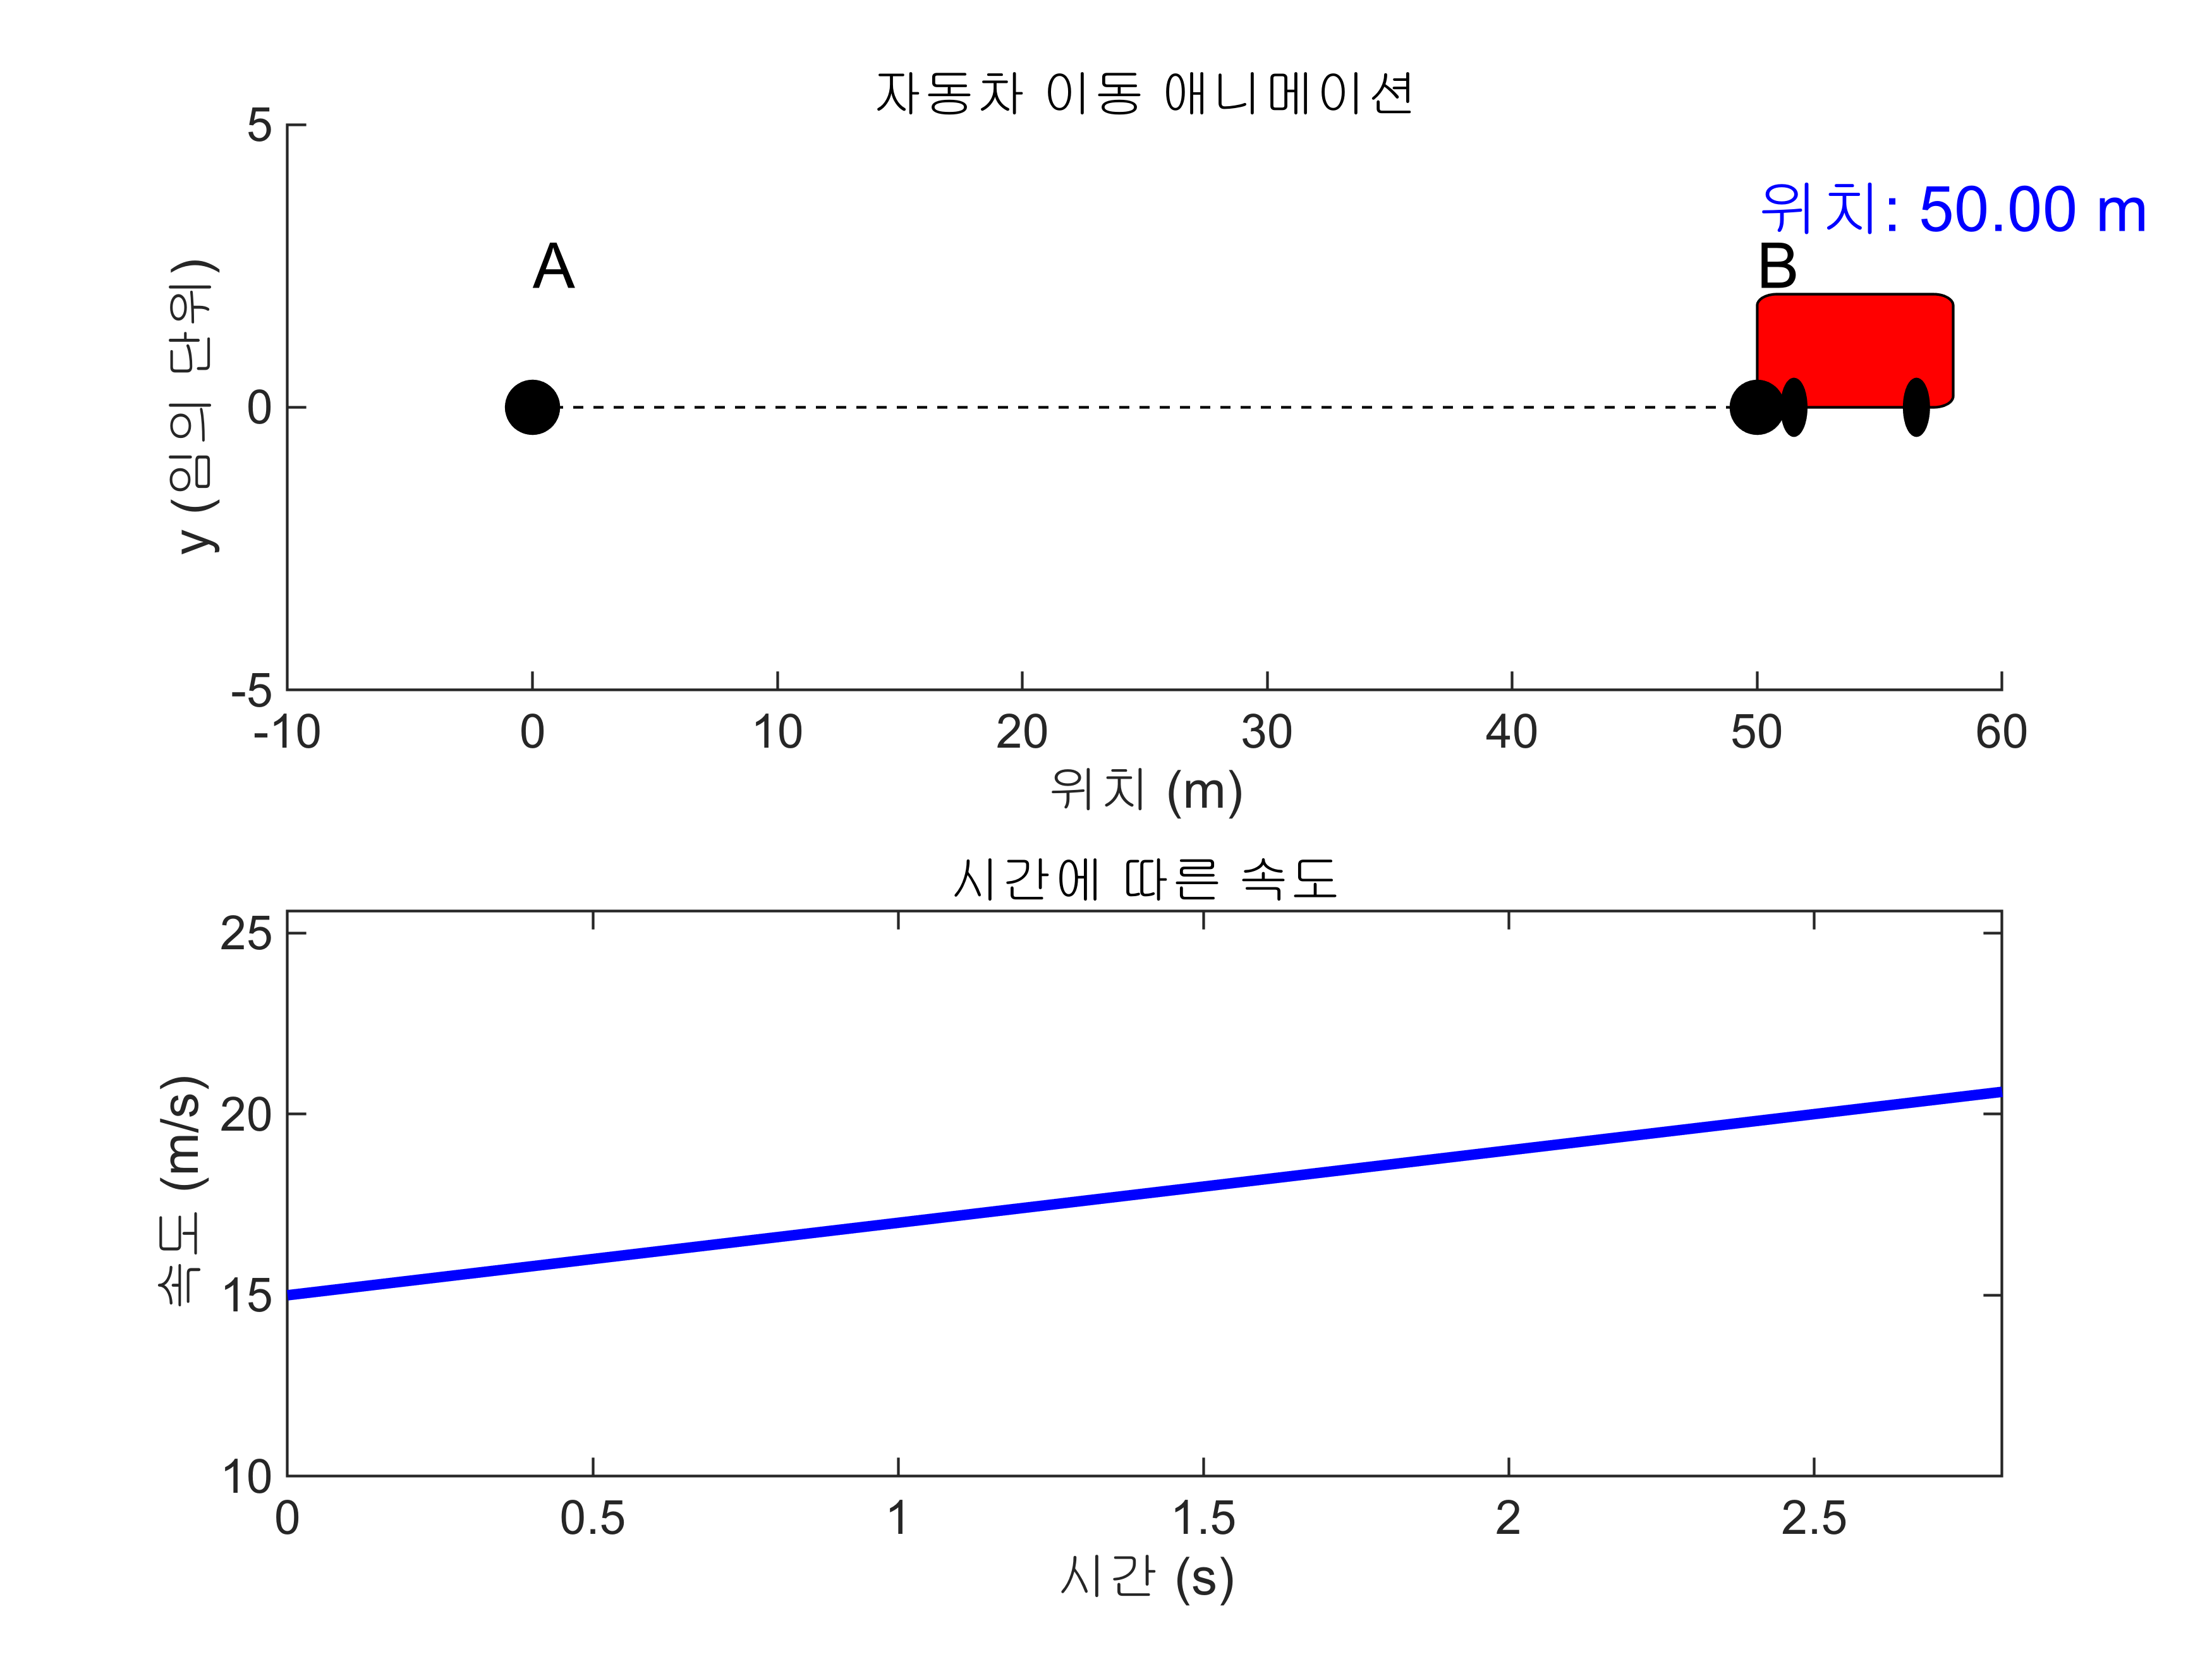

In [42]:
% 초기 조건 설정
v0 = 15;   % 초기 속도 (m/s)
a = 2;     % 가속도 (m/s^2)
d_AB = 50; % A에서 B까지의 거리 (m)
x_A = 0;   % A 지점의 위치

% B 지점에 도달할 때까지 걸리는 시간 계산
% x(t) = v0 * t + 1/2 * a * t^2 = 50
syms t;
eqn = v0 * t + (1/2) * a * t^2 == d_AB;
t_sol = double(solve(eqn, t));  % 시간 계산 (복수 해 존재)

% 양수 해 선택 (음수 시간은 무시)
t_B = t_sol(t_sol > 0);  % 양수인 해만 선택

% 시간 범위 설정
t_vals = linspace(0, t_B, 100);

% 위치 및 속도 계산
x_vals = v0 * t_vals + (1/2) * a * t_vals.^2;  % 위치
v_vals = v0 + a * t_vals;  % 속도

% 애니메이션과 속도-시간 그래프를 위한 figure
figure;

% 1번째 서브플롯: 애니메이션 준비
subplot(2,1,1);  % 2x1 배열의 첫 번째 서브플롯
hold on;
xlim([x_A-10, d_AB+10]);
ylim([-5, 5]);
title('자동차 이동 애니메이션');
xlabel('위치 (m)');
ylabel('y (임의 단위)');

% 차 그래픽 생성 (간단한 박스 모양으로)
car_body = rectangle('Position', [x_A, 0, 8, 2], 'Curvature', [0.2, 0.2], 'FaceColor', 'r');  % 자동차 본체
wheel1 = rectangle('Position', [x_A+1, -0.5, 1, 1], 'Curvature', [1, 1], 'FaceColor', 'k');  % 앞 바퀴
wheel2 = rectangle('Position', [x_A+6, -0.5, 1, 1], 'Curvature', [1, 1], 'FaceColor', 'k');  % 뒷 바퀴

% A와 B 지점 표시
plot([x_A, d_AB], [0, 0], 'ko', 'MarkerSize', 10, 'MarkerFaceColor', 'k');
text(x_A, 2.5, 'A', 'FontSize', 12);
text(d_AB, 2.5, 'B', 'FontSize', 12);
plot([x_A, d_AB], [0, 0], 'k--');  % A와 B를 잇는 점선

% 위치 정보를 텍스트로 추가 (초기 위치 텍스트)
position_text = text(x_A, 3.5, sprintf('위치: %.2f m', x_vals(1)), 'FontSize', 12, 'Color', 'b');

% 2번째 서브플롯: 속도 vs 시간 그래프
subplot(2,1,2);  % 2x1 배열의 두 번째 서브플롯
h = plot(t_vals(1), v_vals(1), 'b-', 'LineWidth', 2);  % 초기 속도 그래프
xlim([0, t_B]);
ylim([min(v_vals)-5, max(v_vals)+5]);
title('시간에 따른 속도');
xlabel('시간 (s)');
ylabel('속도 (m/s)');

% 애니메이션 루프
for i = 1:length(t_vals)
    % 첫 번째 서브플롯에서 자동차 위치 업데이트
    subplot(2,1,1);
    set(car_body, 'Position', [x_vals(i), 0, 8, 2]);  % 자동차 본체 위치 업데이트
    set(wheel1, 'Position', [x_vals(i)+1, -0.5, 1, 1]);  % 앞 바퀴 위치 업데이트
    set(wheel2, 'Position', [x_vals(i)+6, -0.5, 1, 1]);  % 뒷 바퀴 위치 업데이트

    % 위치 정보를 텍스트로 업데이트
    set(position_text, 'Position', [x_vals(i), 3.5], 'String', sprintf('위치: %.2f m', x_vals(i)));

    % 두 번째 서브플롯에서 속도 그래프 업데이트
    subplot(2,1,2);
    set(h, 'XData', t_vals(1:i), 'YData', v_vals(1:i));  % 속도 그래프 업데이트

    pause(0.1);  % 애니메이션 속도 조절
end

hold off;


<p style="text-align:left">
   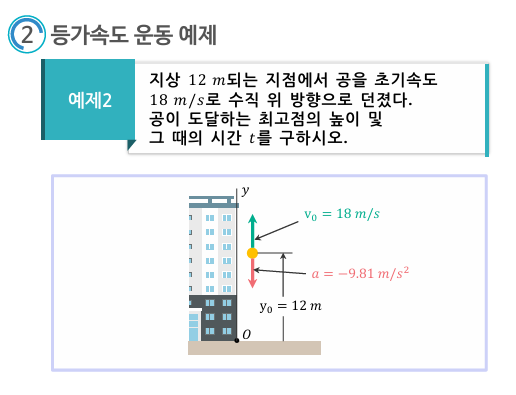
</p>


**문제 정리:**

-  초기 속도 $v_0 =18\,\textrm{m/s}$ (위쪽 방향으로)
-  중력 가속도 $a=-9.81\,{\textrm{m/s}}^2$ (아래 방향으로)
-  초기 높이 $y_0 =12\,\textrm{m}$

**1. 최고점에서의 속도:**


최고점에서 속도 $v=0$ 입니다. 따라서, 공이 최고점에 도달하는 시간을 구하려면 속도와 가속도의 관계식을 사용합니다:


$$v(t)=v_0 +at$$

최고점에서 $v(t)=0$ 이므로:


$$0=18+(-9.81)t$$

$$t=\frac{18}{9.81}\approx 1.83\,\textrm{초}$$

따라서, 공이 최고점에 도달하는 시간은 **1.83초**입니다.


**2. 최고점에서의 높이:**


최고점에서의 위치를 구하려면 위치 방정식을 사용합니다:


$$y(t)=y_0 +v_0 t+\frac{1}{2}at^2$$

 $t=1.83$ 를 대입하여 최고점에서의 높이를 계산하면:


$$y(1.83)=12+18(1.83)+\frac{1}{2}(-9.81)(1.83)^2$$

$$y(1.83)=12+32.94-16.44=28.5\,\textrm{m}$$

따라서, 공이 도달하는 최고점의 높이는 **28.5m**입니다.


In [43]:
% 초기 조건 설정
v0 = 18;   % 초기 속도 (m/s)
a = -9.81; % 중력 가속도 (m/s^2)
y0 = 12;   % 초기 높이 (m)

% 최고점에 도달하는 시간 계산
t_max = -v0 / a;

% 최고점에서의 높이 계산
y_max = y0 + v0 * t_max + 0.5 * a * t_max^2;

% 결과 출력
disp(['최고점에 도달하는 시간: ', num2str(t_max), ' 초']);

최고점에 도달하는 시간: 1.8349 초

In [44]:
disp(['최고점에서의 높이: ', num2str(y_max), ' m']);

최고점에서의 높이: 28.5138 m


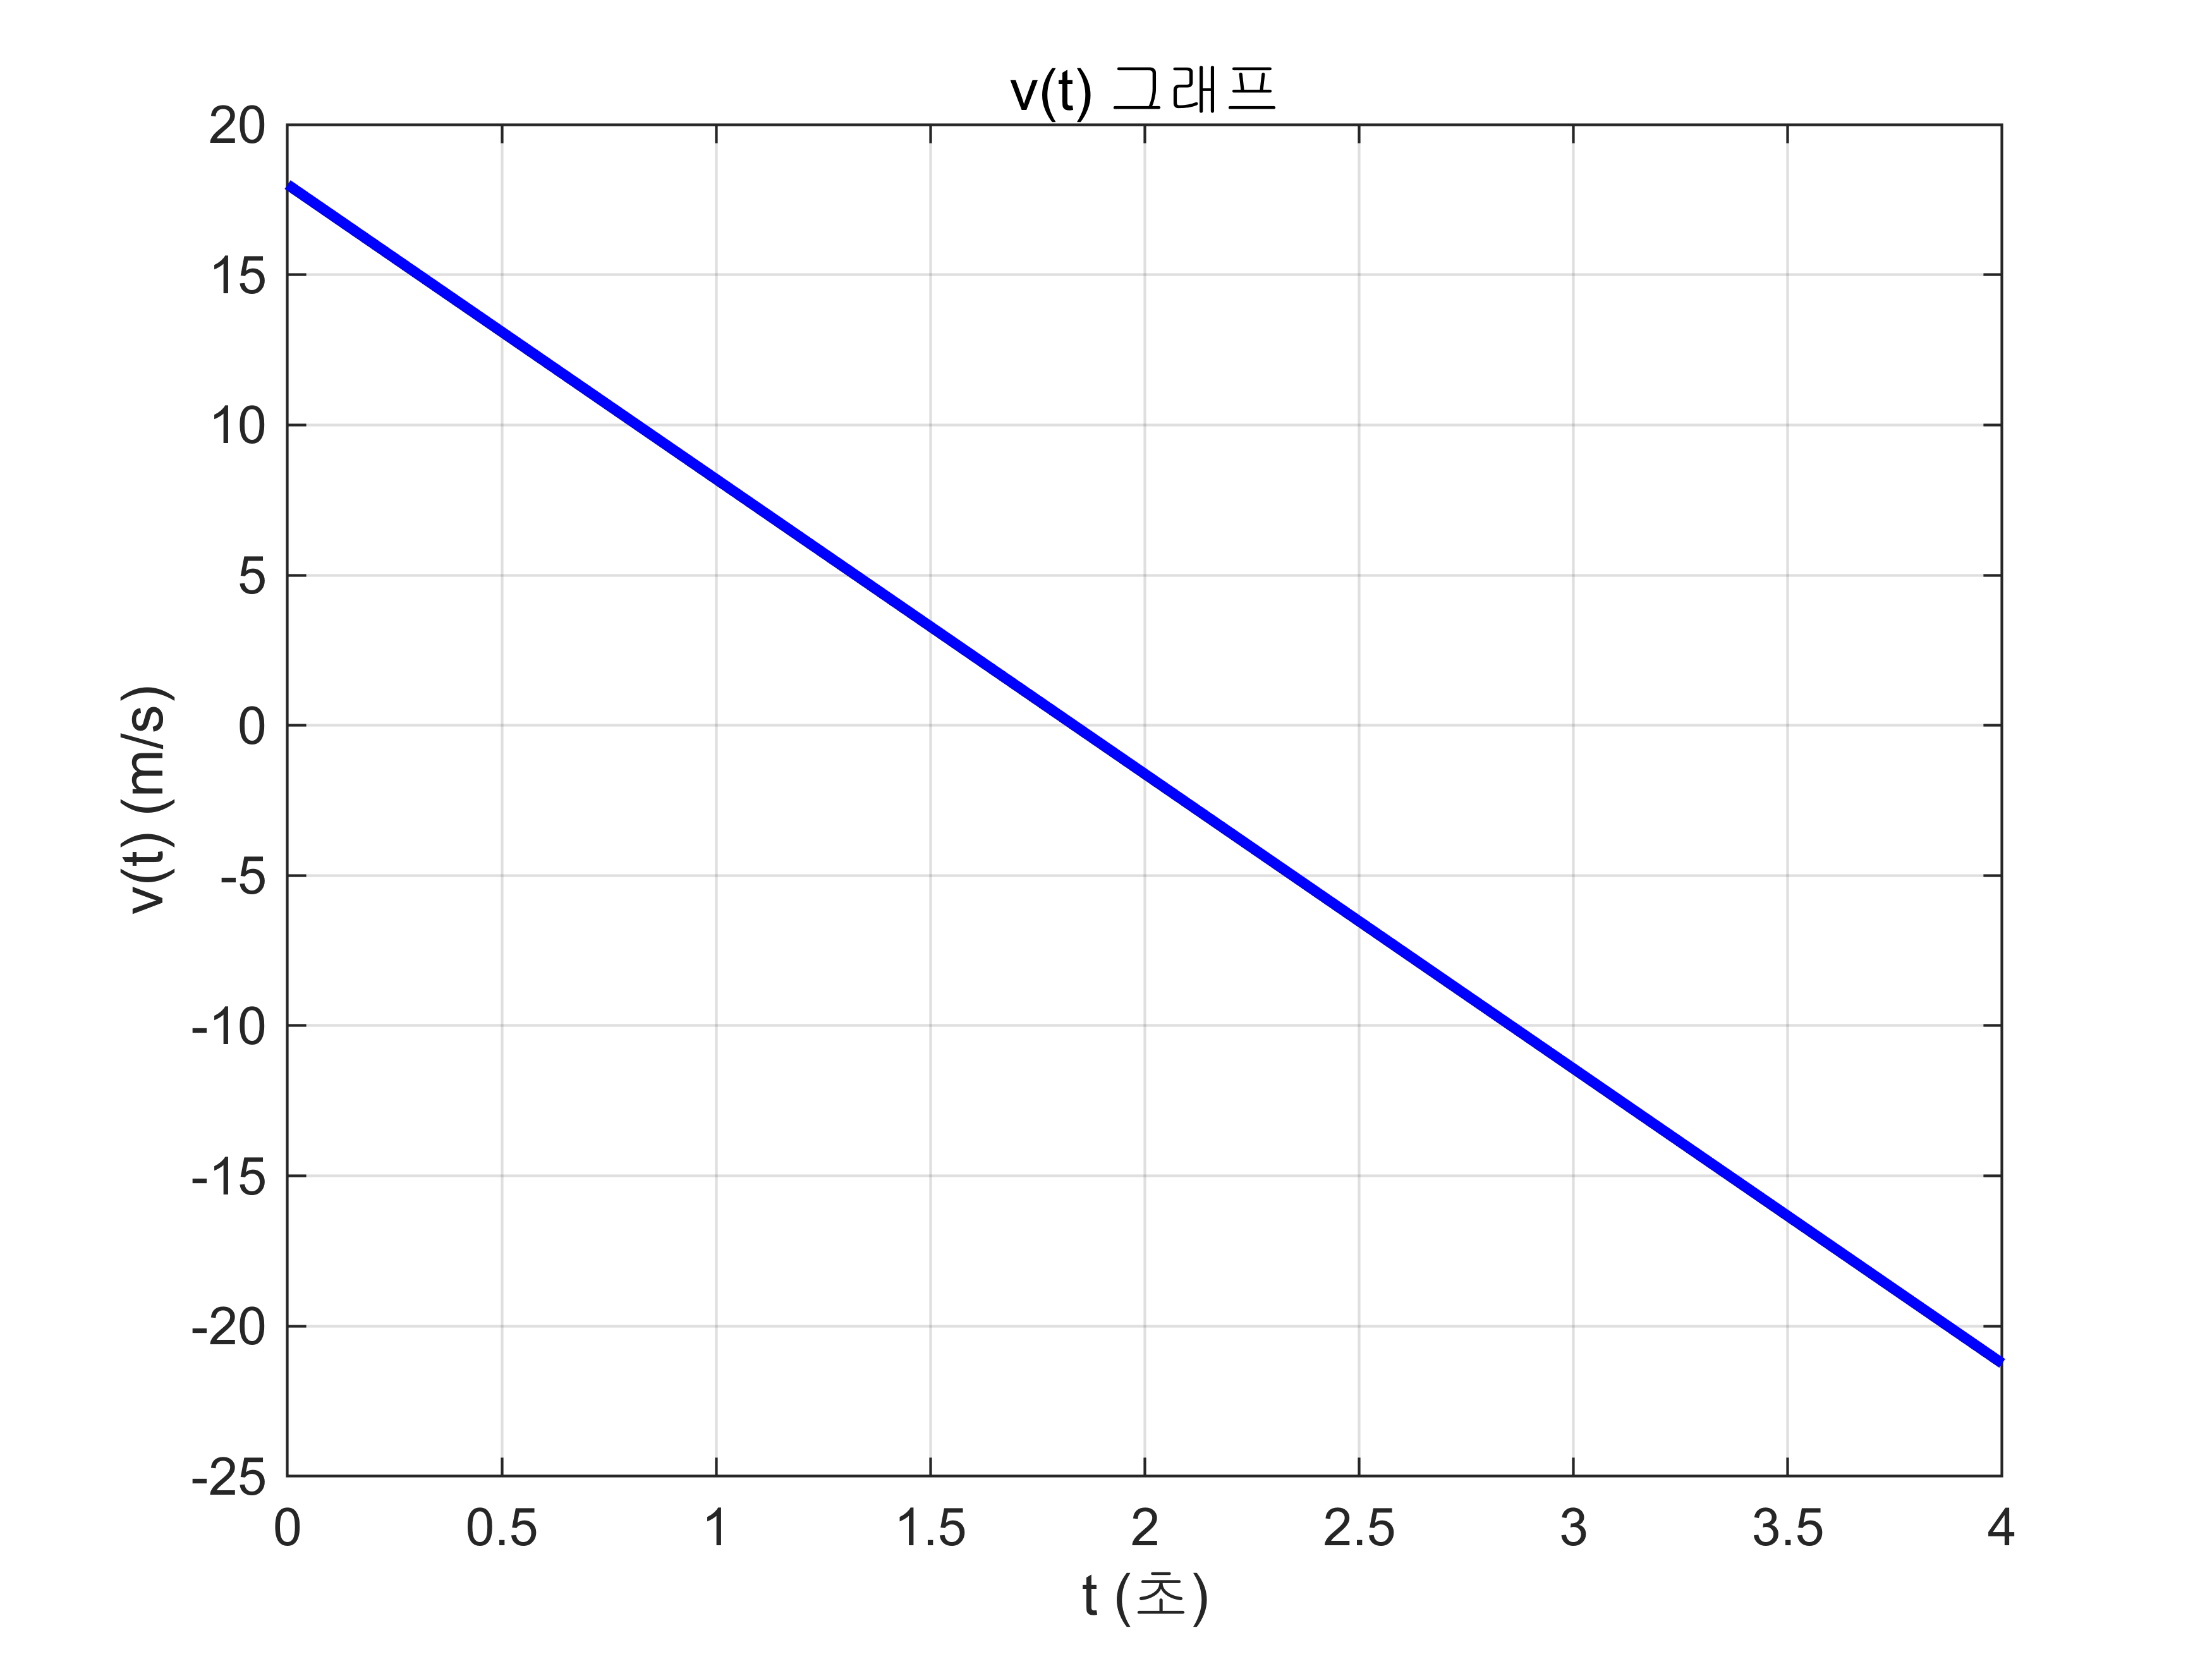

In [45]:

% 속도 그래프 그리기
t = linspace(0, 4, 100);
v = v0 + a * t;

figure;
plot(t, v, 'b', 'LineWidth', 2);
title('v(t) 그래프');
xlabel('t (초)');
ylabel('v(t) (m/s)');
grid on;


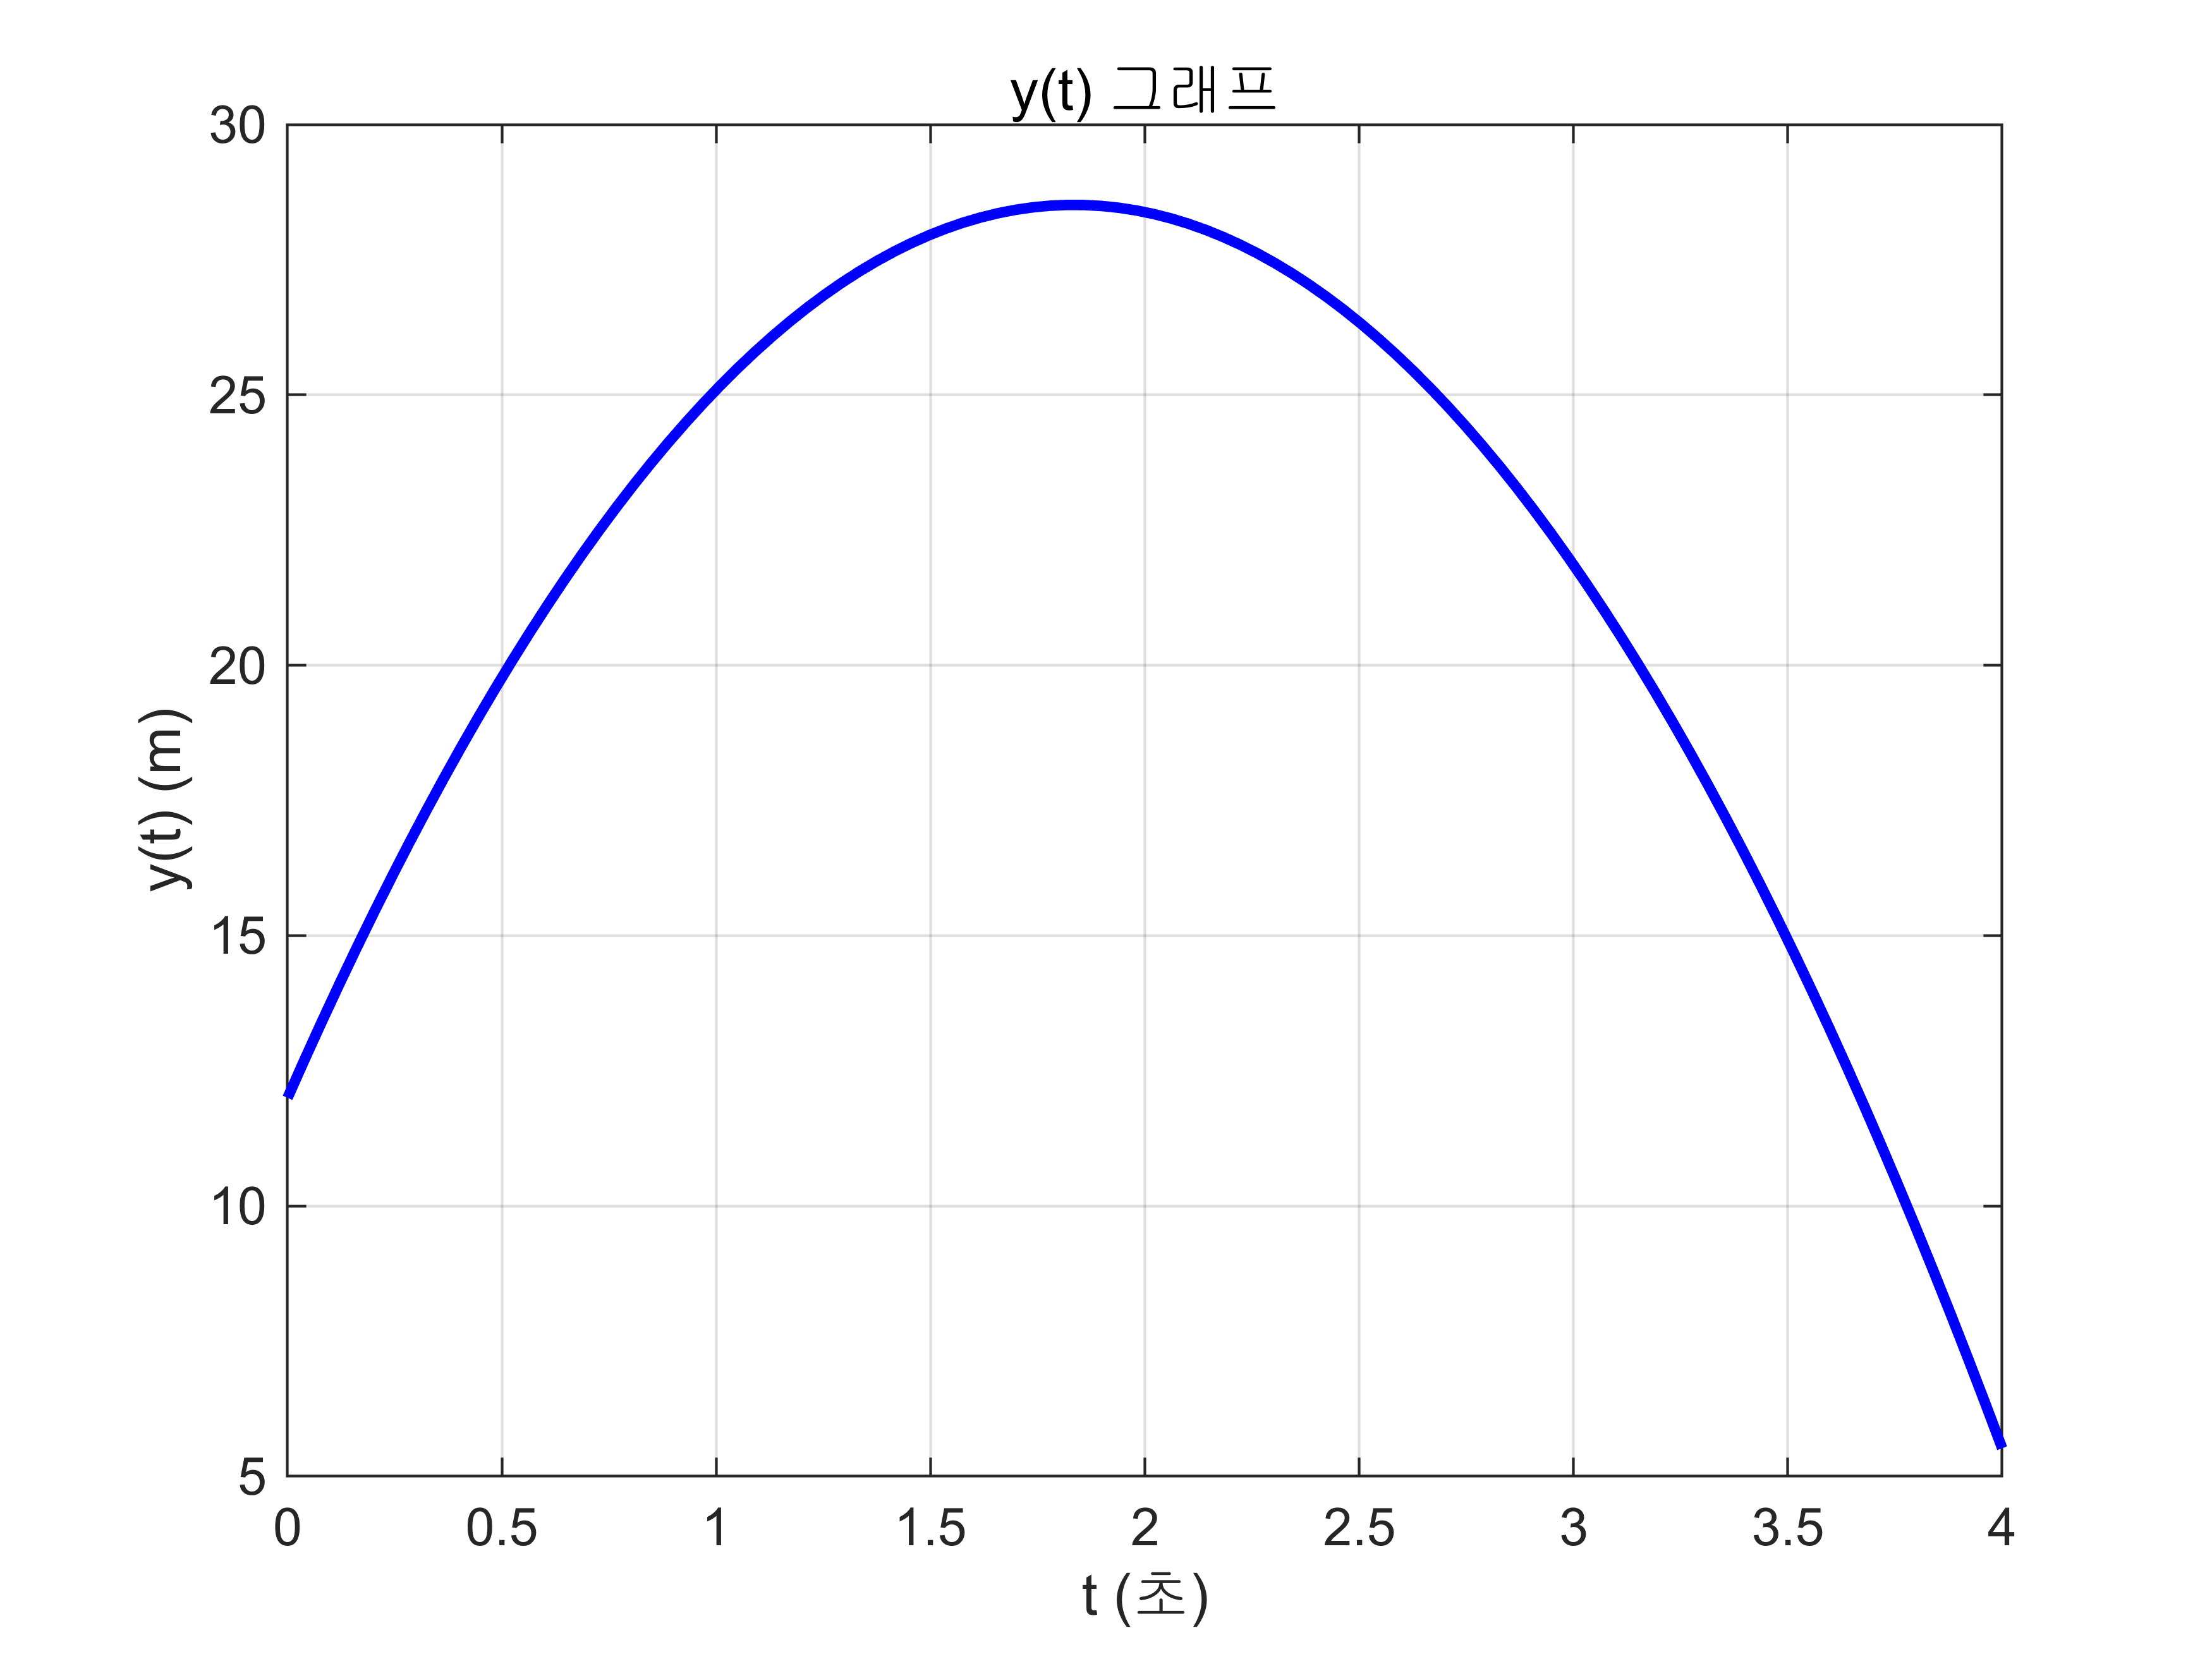

In [46]:

% 위치 그래프 그리기
t = linspace(0, 4, 100);  % 시간 범위 설정
y = y0 + v0 * t + 0.5 * a * t.^2;  % 위치 함수

figure;
plot(t, y, 'b', 'LineWidth', 2);
title('y(t) 그래프');
xlabel('t (초)');
ylabel('y(t) (m)');
grid on;


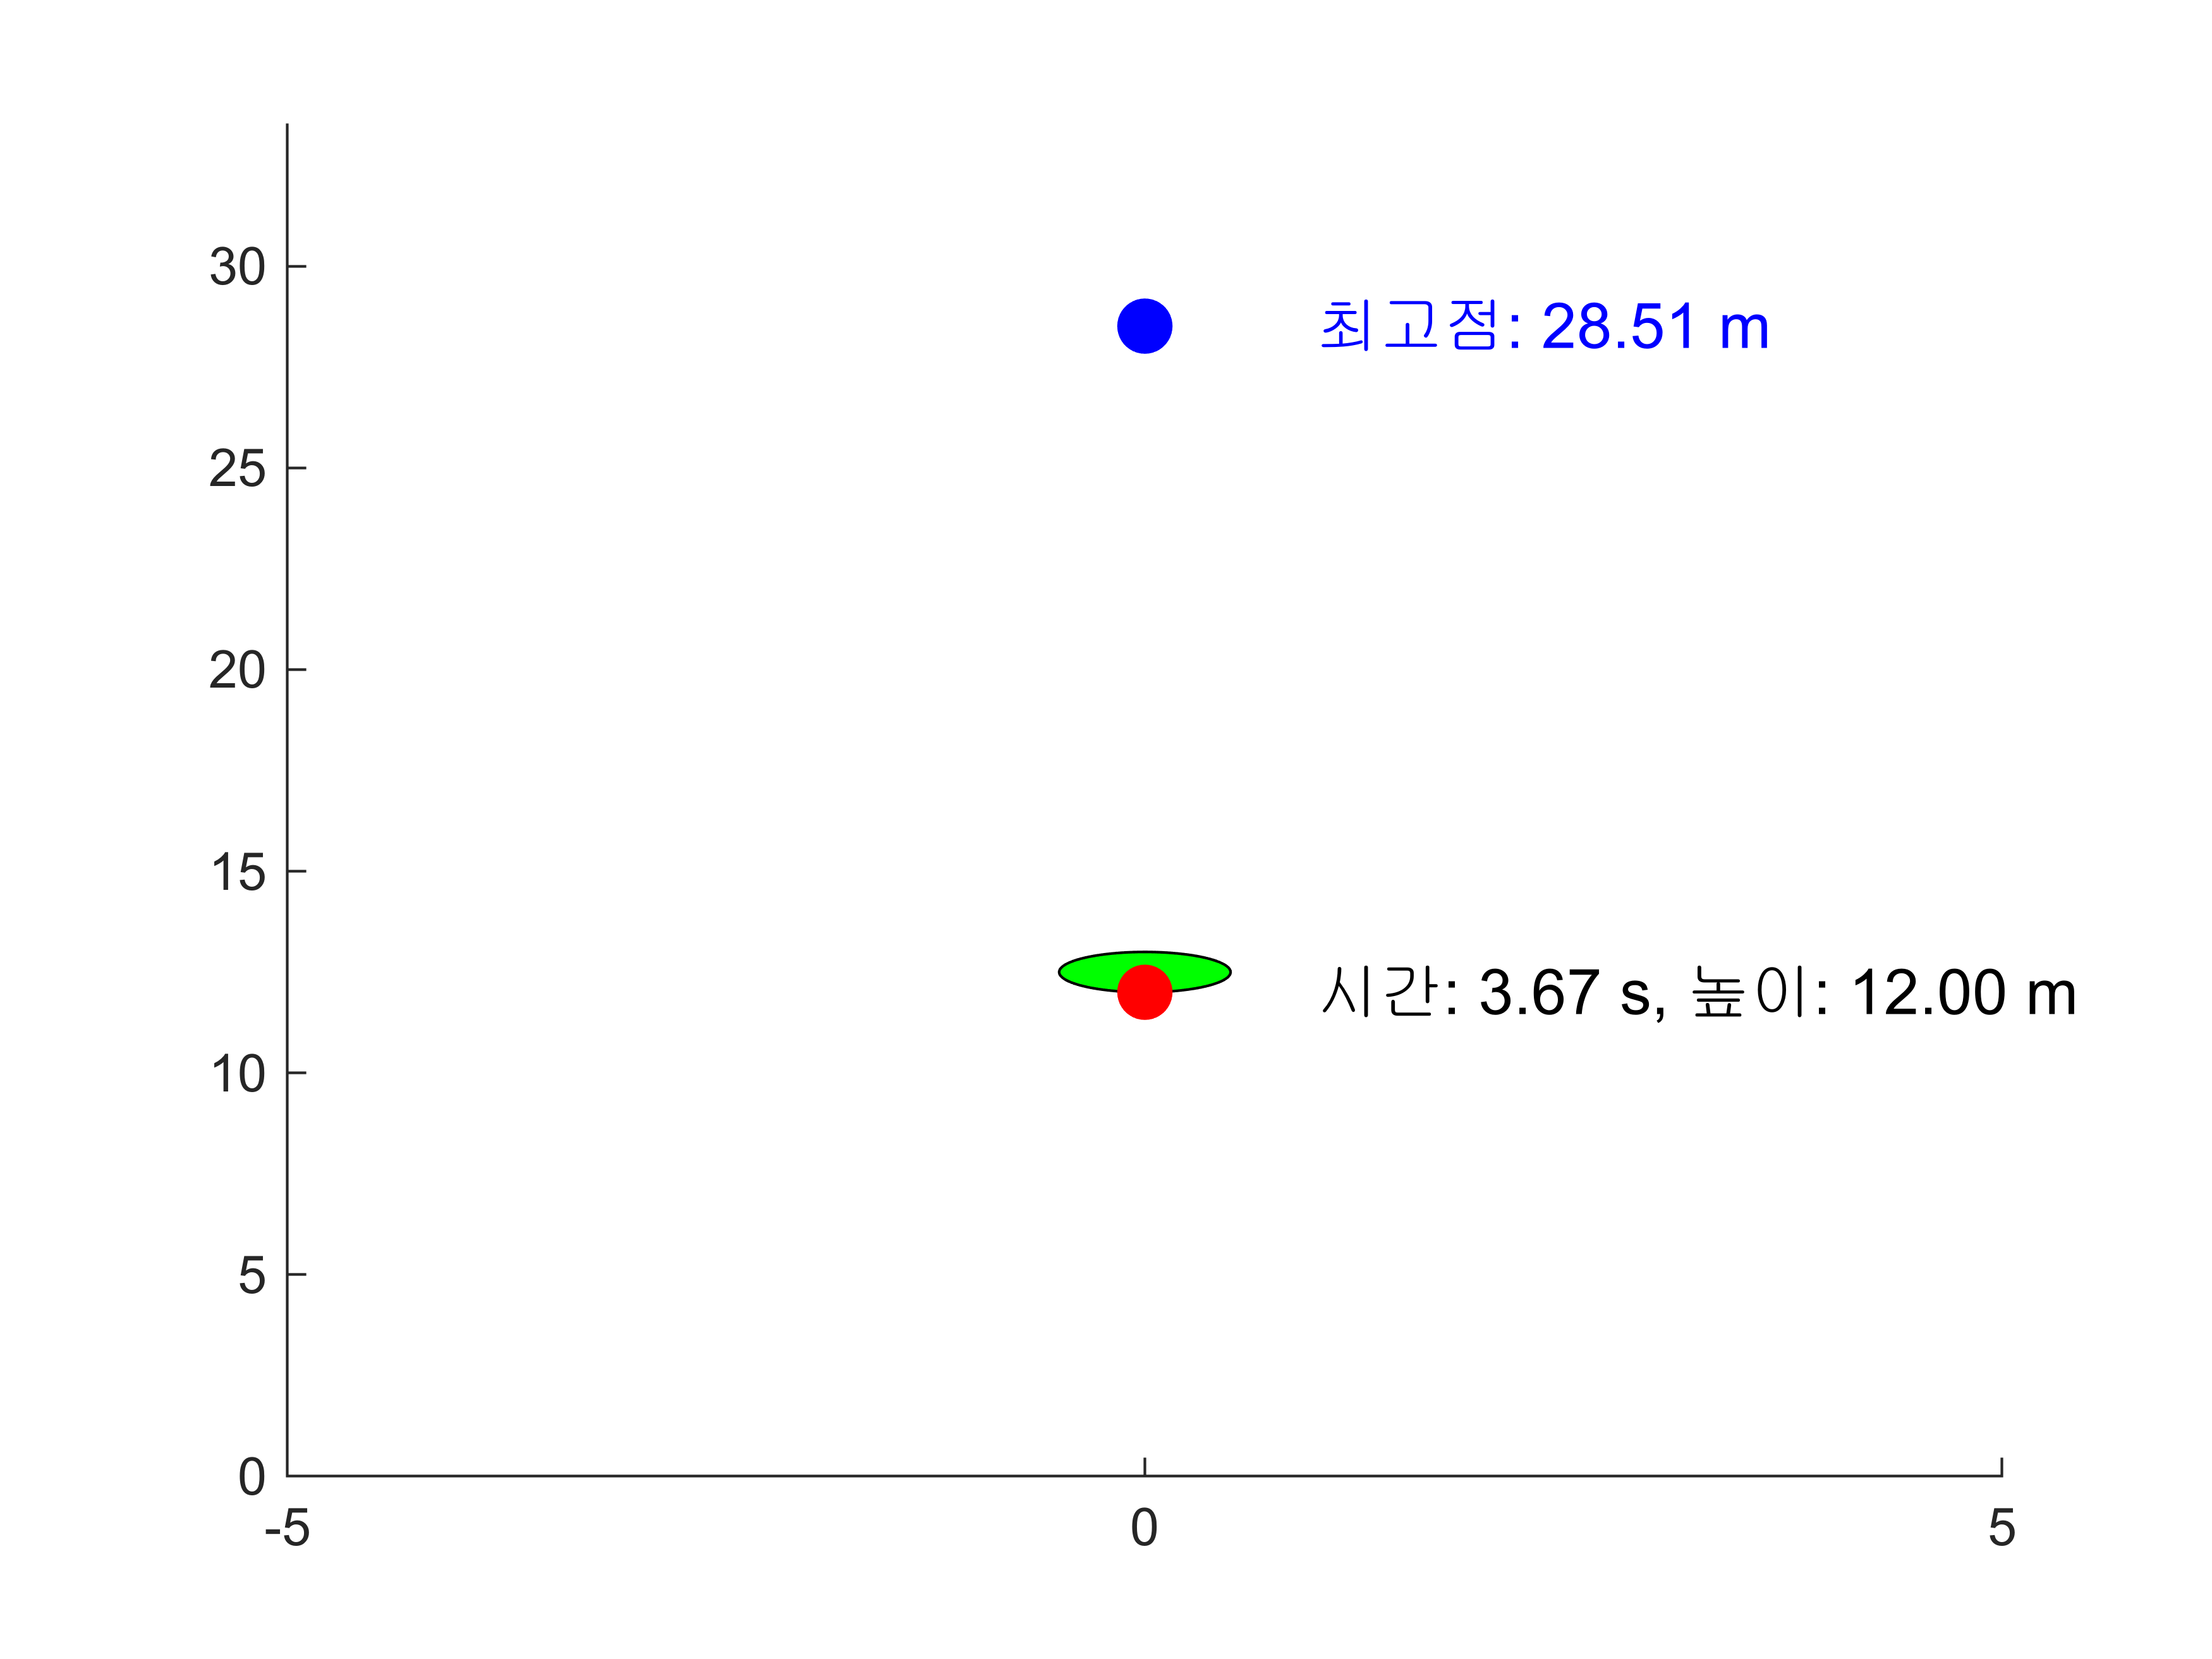

In [47]:

% 초기 조건 설정
y0 = 12;   % 초기 위치 (m)
v0 = 18;   % 초기 속도 (m/s)
g = 9.81;  % 중력 가속도 (m/s^2)

% 최고점 도달 시간 계산
t_peak = v0 / g;

% 최고점에서의 위치
y_peak = y0 + v0 * t_peak - (1/2) * g * t_peak^2;

% 전체 운동 시간을 계산 (왕복)
t_total = 2 * t_peak;

% 시간 범위 설정
t_vals = linspace(0, t_total, 100);

% 시간에 따른 위치 계산
y_vals = y0 + v0 * t_vals - (1/2) * g * t_vals.^2;

% 애니메이션 준비
figure;
hold on;
xlim([-5, 5]);  % x축 범위
ylim([0, max(y_vals)+5]);  % y축 범위 (물체가 움직이는 범위)

% 공 그래픽 생성 (완전한 원형으로)
ball = rectangle('Position', [-0.5, y0, 1, 1], 'Curvature', [1, 1], 'FaceColor', 'g');

% 최고점과 초기 위치 표시
plot(0, y0, 'ro', 'MarkerSize', 10, 'MarkerFaceColor', 'r');  % 초기 위치
plot(0, y_peak, 'bo', 'MarkerSize', 10, 'MarkerFaceColor', 'b');  % 최고점 위치
text(1, y_peak, sprintf('최고점: %.2f m', y_peak), 'FontSize', 12, 'Color', 'b');

% 위치 및 시간 정보 텍스트 추가 (처음에는 초기 위치에서 표시)
position_text = text(1, y0, sprintf('시간: %.2f s, 높이: %.2f m', 0, y0), 'FontSize', 12, 'Color', 'k');

% 애니메이션 루프
for i = 1:length(t_vals)
    % 공 위치 업데이트
    set(ball, 'Position', [-0.5, y_vals(i), 1, 1]);  % 공의 y 위치 업데이트

    % 공의 위치 및 시간 정보를 실시간으로 업데이트
    set(position_text, 'Position', [1, y_vals(i)], 'String', sprintf('시간: %.2f s, 높이: %.2f m', t_vals(i), y_vals(i)));

    pause(0.05);  % 애니메이션 속도 조절
end

hold off;


<p style="text-align:left">
   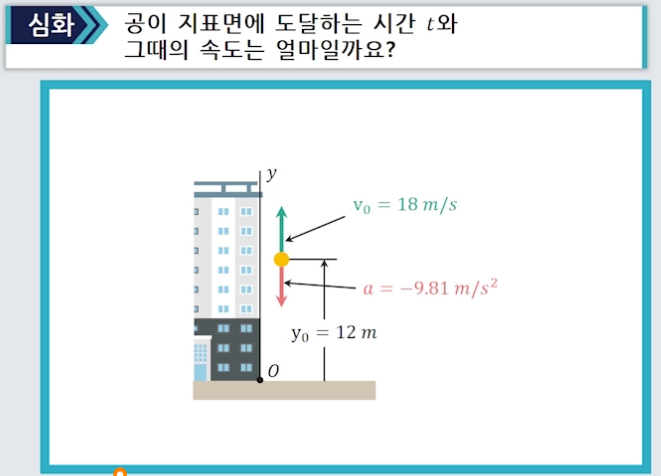
</p>


-  초기 위치 $y_0 =12\,\textrm{m}$
-  초기 속도 $v_0 =18\,\textrm{m/s}$ (위 방향)
-  중력 가속도 $a=-9.81\,{\textrm{m/s}}^2$

**공이 지면에 도달하는 시간과 속도를 구하는 방법:**

1.  **운동 방정식**: 위치 $y(t)$ 는 시간 t에 대한 2차 함수로 표현할 수 있습니다: $y(t)=y_0 +v_0 t+\frac{1}{2}at^2$ 여기서 $y(t)=0$ 일 때 공이 지면에 도달하므로, 이 식을 풀어 공이 지면에 도달할 때의 시간 t를 구합니다.
2. **속도 계산**: 속도는 다음 식으로 표현할 수 있습니다: $tv(t)=v_0 +at$ 구한 t 값을 이용해 공이 지면에 도달할 때의 속도를 계산합니다.

In [48]:
% 주어진 값
y0 = 12;    % 초기 위치 (m)
v0 = 18;    % 초기 속도 (m/s)
g = 9.81;   % 중력 가속도 (m/s^2)

% 운동 방정식: y(t) = y0 + v0*t - (1/2)*g*t^2
% y(t) = 0일 때의 시간을 구함 (이차 방정식 풀이)
syms t
eqn = y0 + v0*t - (1/2)*g*t^2 == 0;
t_sol = double(solve(eqn, t));

% 양의 시간 해 선택
t_ground = max(t_sol);  % 지면에 도달하는 시간

% 속도 계산: v(t) = v0 - g*t
v_ground = v0 - g * t_ground;

% 결과 출력
fprintf('지면에 도달하는 시간: %.2f 초\n', t_ground);

지면에 도달하는 시간: 4.25 초

In [49]:
fprintf('지면에 도달할 때 속도: %.2f m/s\n', v_ground);

지면에 도달할 때 속도: -23.65 m/s


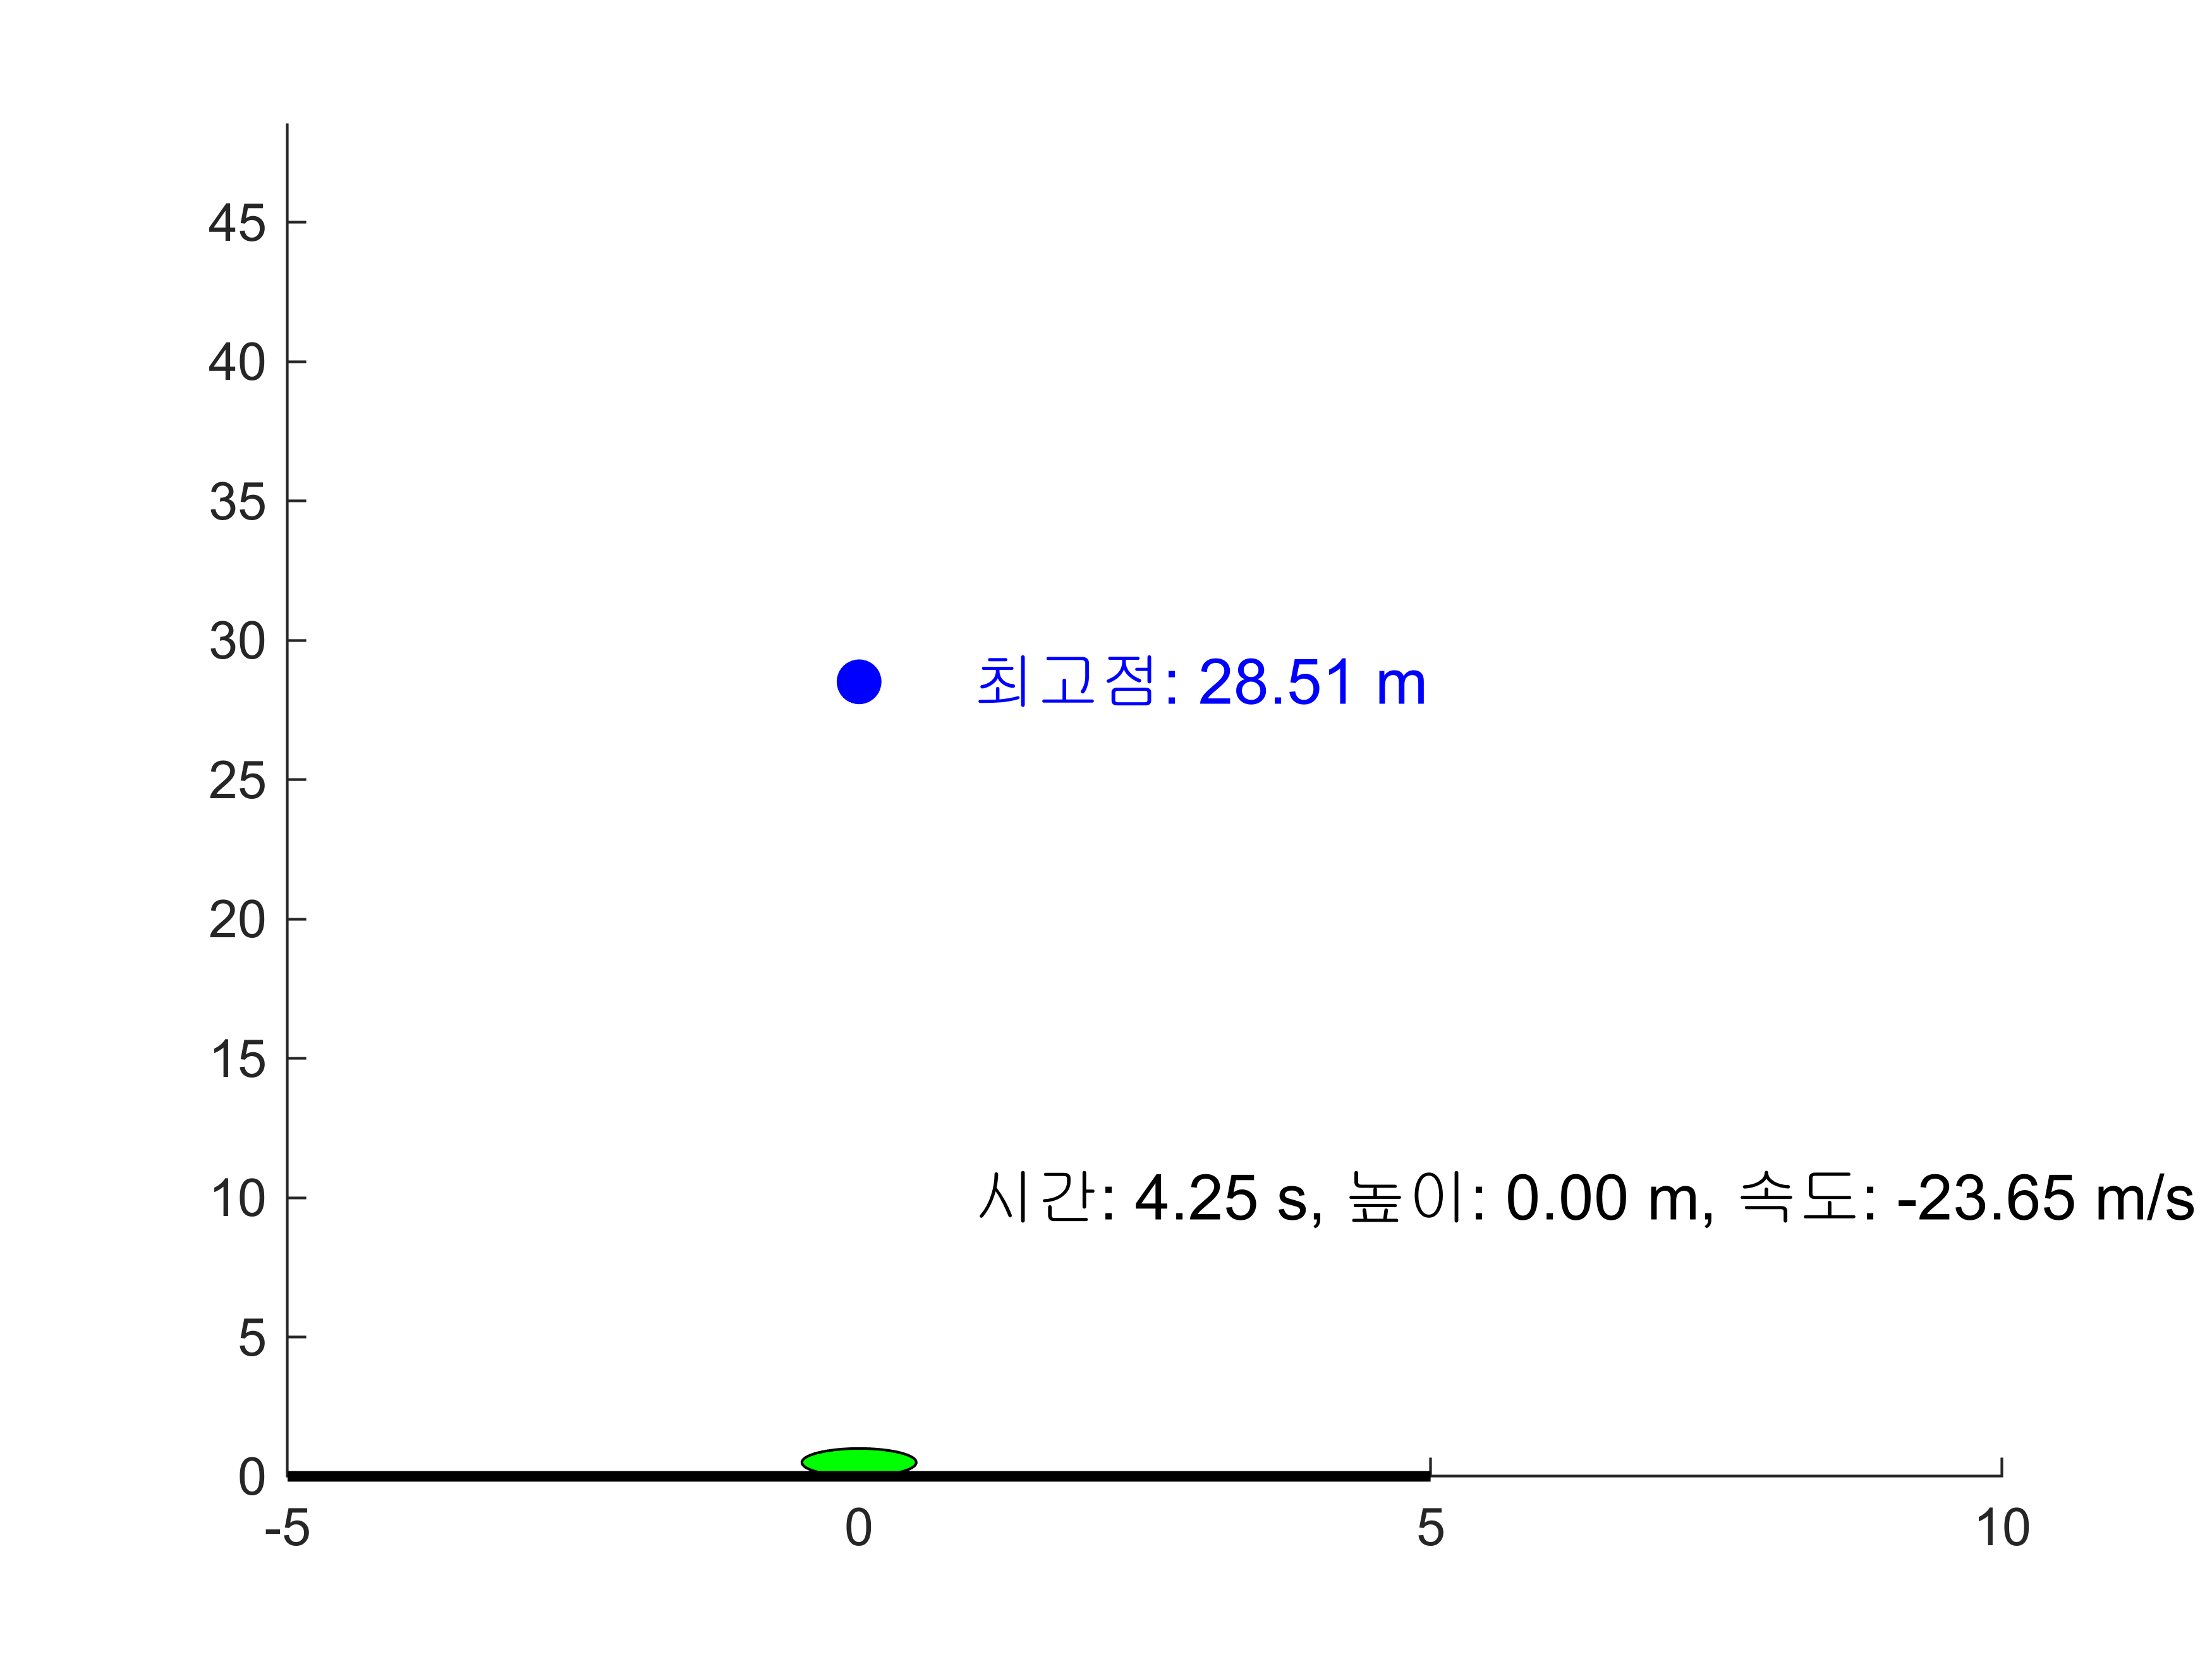

In [50]:
% 초기 조건 설정
y0 = 12;    % 초기 위치 (m)
v0 = 18;    % 초기 속도 (m/s)
g = 9.81;   % 중력 가속도 (m/s^2)

% 운동 방정식: y(t) = y0 + v0*t - (1/2)*g*t^2
% y(t) = 0일 때의 시간을 구함 (이차 방정식 풀이)
syms t
eqn = y0 + v0*t - (1/2)*g*t^2 == 0;
t_sol = double(solve(eqn, t));

% 양의 시간 해 선택
t_ground = max(t_sol);  % 지면에 도달하는 시간

% 최고점 계산
t_peak = v0 / g;
y_peak = y0 + v0 * t_peak - (1/2) * g * t_peak^2;

% 시간 범위 설정
t_vals = linspace(0, t_ground, 100);

% 시간에 따른 위치 및 속도 계산
y_vals = y0 + v0 * t_vals - (1/2) * g * t_vals.^2;  % 위치
v_vals = v0 - g * t_vals;  % 속도

% 애니메이션 준비
figure;
hold on;
xlim([-5, 10]);  % x축 범위
ylim([0, y_peak + 20]);

% 공 그래픽 생성 (원형으로 표시)
ball = rectangle('Position', [-0.5, y0, 1, 1], 'Curvature', [1, 1], 'FaceColor', 'g');

% 지면 표시
plot([-5, 5], [0, 0], 'k', 'LineWidth', 2);  % 지면

% 위치 및 시간 정보 텍스트 추가 (처음에는 초기 위치에서 표시)
position_text = text(1, y0 +1, sprintf('시간: %.2f s, 높이: %.2f m, 속도: %.2f m/s', 0, y0, v0), 'FontSize', 12, 'Color', 'k');

% 최고점 표시
plot(0, y_peak, 'bo', 'MarkerSize', 8, 'MarkerFaceColor', 'b');  % 최고점 표시
text(1, y_peak, sprintf('최고점: %.2f m', y_peak), 'FontSize', 12, 'Color', 'b');

% 애니메이션 루프
for i = 1:length(t_vals)
    % 공 위치 업데이트
    set(ball, 'Position', [-0.5, y_vals(i), 1, 1]);  % 공의 y 위치 업데이트

    % 공의 위치, 시간 및 속도 정보를 실시간으로 업데이트
    set(position_text, 'Position', [1, y_vals(i) + 10], 'String', sprintf('시간: %.2f s, 높이: %.2f m, 속도: %.2f m/s', t_vals(i), y_vals(i), v_vals(i)));

    pause(0.05);  % 애니메이션 속도 조절
end

hold off;



!!!EndOutputRegion!!!